In [1]:
import numpy as np
import pandas as pd
import pickle
import math

#display
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
from IPython.display import clear_output
pd.set_option('display.max_columns', None)

import sys
sys.path.append("../")
import src.supportCharts as sc
sys.path.append("../")
import src.supportClean as scl

# input

In [2]:
df = pd.read_csv('../data/grid.csv')
print(df.shape)
df.head()

(12310, 123)


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
0,446400.0,4.477265e+06,1,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,79.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,446400.0,4.481768e+06,2,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
2,446400.0,4.472935e+06,3,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,2.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,7.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,8.0,4.0,57.0,0.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0,15.0,0.0,1.0,0.0,0.0,115.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
3,446400.0,4.477438e+06,4,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,34.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,2.0,35.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,81.0,0.0,NaN,NaN,NaN,NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Columns: 123 entries, X to rn_med_tramo
dtypes: float64(108), int64(1), object(14)
memory usage: 11.6+ MB


In [4]:
sc.analisis_basico(df)

_________________________________

1_Data Structure: (12310, 123)


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
0,446400.0,4.477265e+06,1,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,79.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,446400.0,4.481768e+06,2,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Columns: 123 entries, X to rn_med_tramo
dtypes: float64(108), int64(1), object(14)
memory usage: 11.6+ MB


None

_________________________________

2_Duplicated columns:
0
_________________________________

3_Null values distribution:


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
nulos,0,0,0,6464,6464,6464,6464,6464,6464,6464,6464,9880,9880,9880,10735,9880,9880,9880,10735,9880,10735,10735,9880,10735,10735,9880,9714,9714,9714,9714,9714,9714,9714,9714,7925,7925,7925,7925,7925,7925,7925,11787,11699,11699,11699,11699,11699,11747,11800,12310,11699,11787,11699,11699,11699,11699,11699,11699,11699,11699,12306,11699,11699,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,5322
dtypes,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,object,object,float64,object,object,object,object,object,object,object,object,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_zipcode,h_latitude,h_fax,h_cat2cod,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
count,12310.000000,1.231000e+04,12310.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,2430.000000,2430.000000,2430.000000,1575.000000,2430.000000,2430.000000,2430.000000,1575.000000,2430.000000,1575.000000,1575.000000,2430.000000,1575.000000,1575.000000,2430.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,523.000000,611.000000,611.000000,611.000000,0.0,611.000000,611.000000,611.0,8919.000000,8919.0,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,10405.000000,10405.0,10405.000000,10405.00000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,6988.000000
mean,420362.997013,4.253730e+06,6155.500000,286.465446,555.183202,0.111187,4.590012,18.521040,2923.500000,23992.160965,420.108792,2.090123,1.971605,13.840803,2007.519312,1166.326543,1366.224691,2.090123,12965.939418,1034.009053,2399.508069,2489.271166,1182.090159,3359.718783,5.005714,2629.842387,10.032357,38.729584,333.640986,5.110940,4.538521,1298.500000,117.921418,1.122026,2.806613,7.857925,2.100798,7.487571,6.541619,10.664538,7.015964,7029.263862,306.000000,28016.312602,40.428868,NaN,7029.248773,-3.693574,3.0,0.016818,0.0,4.952797,1.226483,31.213925,0.056621,0.145308,0.139814,2.024779,0.237471,1.200807,0.475277,0.645027,9.532571,0.084202,0.912995,0.023882,0.227604,84.604776,0.015697,0.033349,0.0,9.604613,2.37703,46.774147,0.108313,0.282749,0.269870,3.898126,0.458914,2.314272,0.918981,1.244978,18.394618,0.165690,1.763095,0.047381,0.431043,163.148486,0.029

_________________________________

5_Categorical variables distribution:


,h_web,h_title,h_email,h_body,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_country,h_locality
count,611,611,563,510,611,523,611,611,611,611,611,611,611,4
unique,611,611,556,510,607,11,1,606,1,7,611,1,1,1
top,http://www.esmadrid.com/alojamientos/miau_6,Miau,reservas@hostalivor.com,"<p><strong>Su situación, en la plaza de Santa ...",(+34) 91 429 47 01,4 estrellas,Madrid,"Juan XXIII, 3",Alojamientos,Hoteles,Miau,es,Spain,Madrid
freq,1,1,2,1,2,144,611,2,611,259,1,611,611,4


# variables de catastro

In [5]:
cols_catastro = scl.columnList(df, 'cad_')

the columns that have cad_ on their name are: ['cad_tot_houses', 'cad_tot_hab', 'cad_tot_hotels', 'cad_med_consq', 'cad_tot_parcs', 'cad_pk', 'cad_tot_srf_houses', 'cad_tot_srf_hotels']


numeric variables distribution


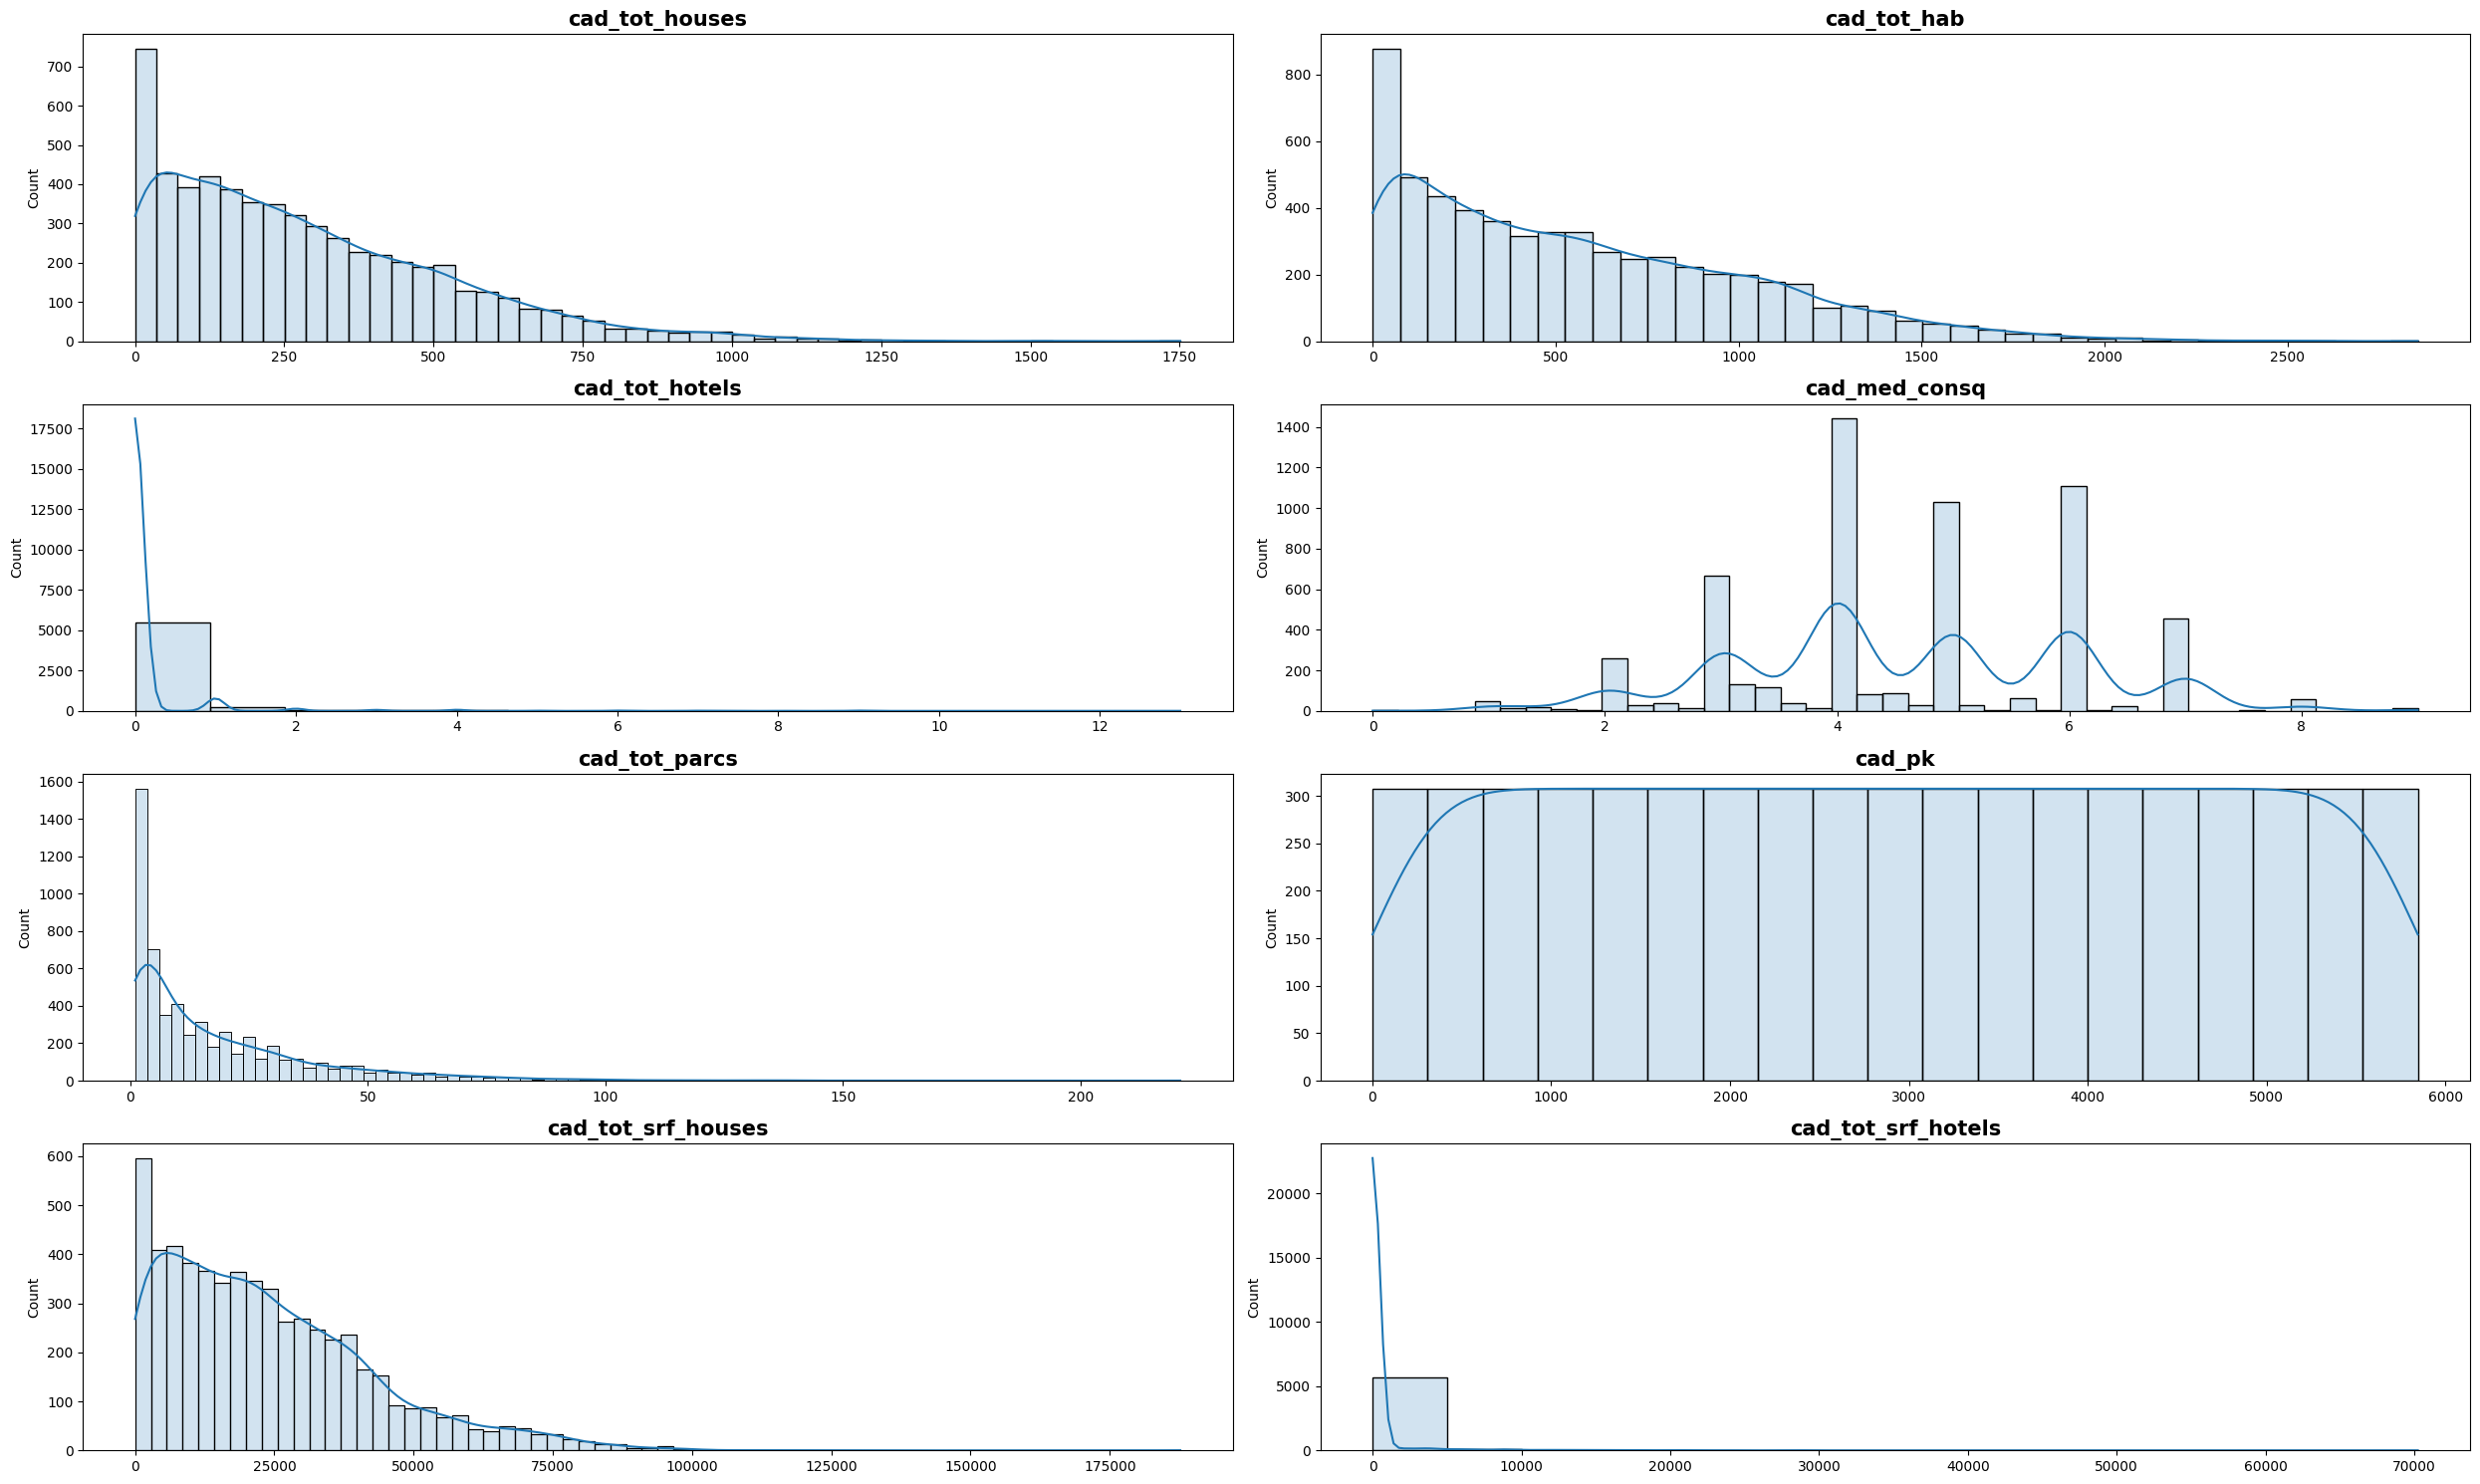

In [6]:
sc.distribucion_numericas(df[cols_catastro])

numeric variables distribution -> outliers


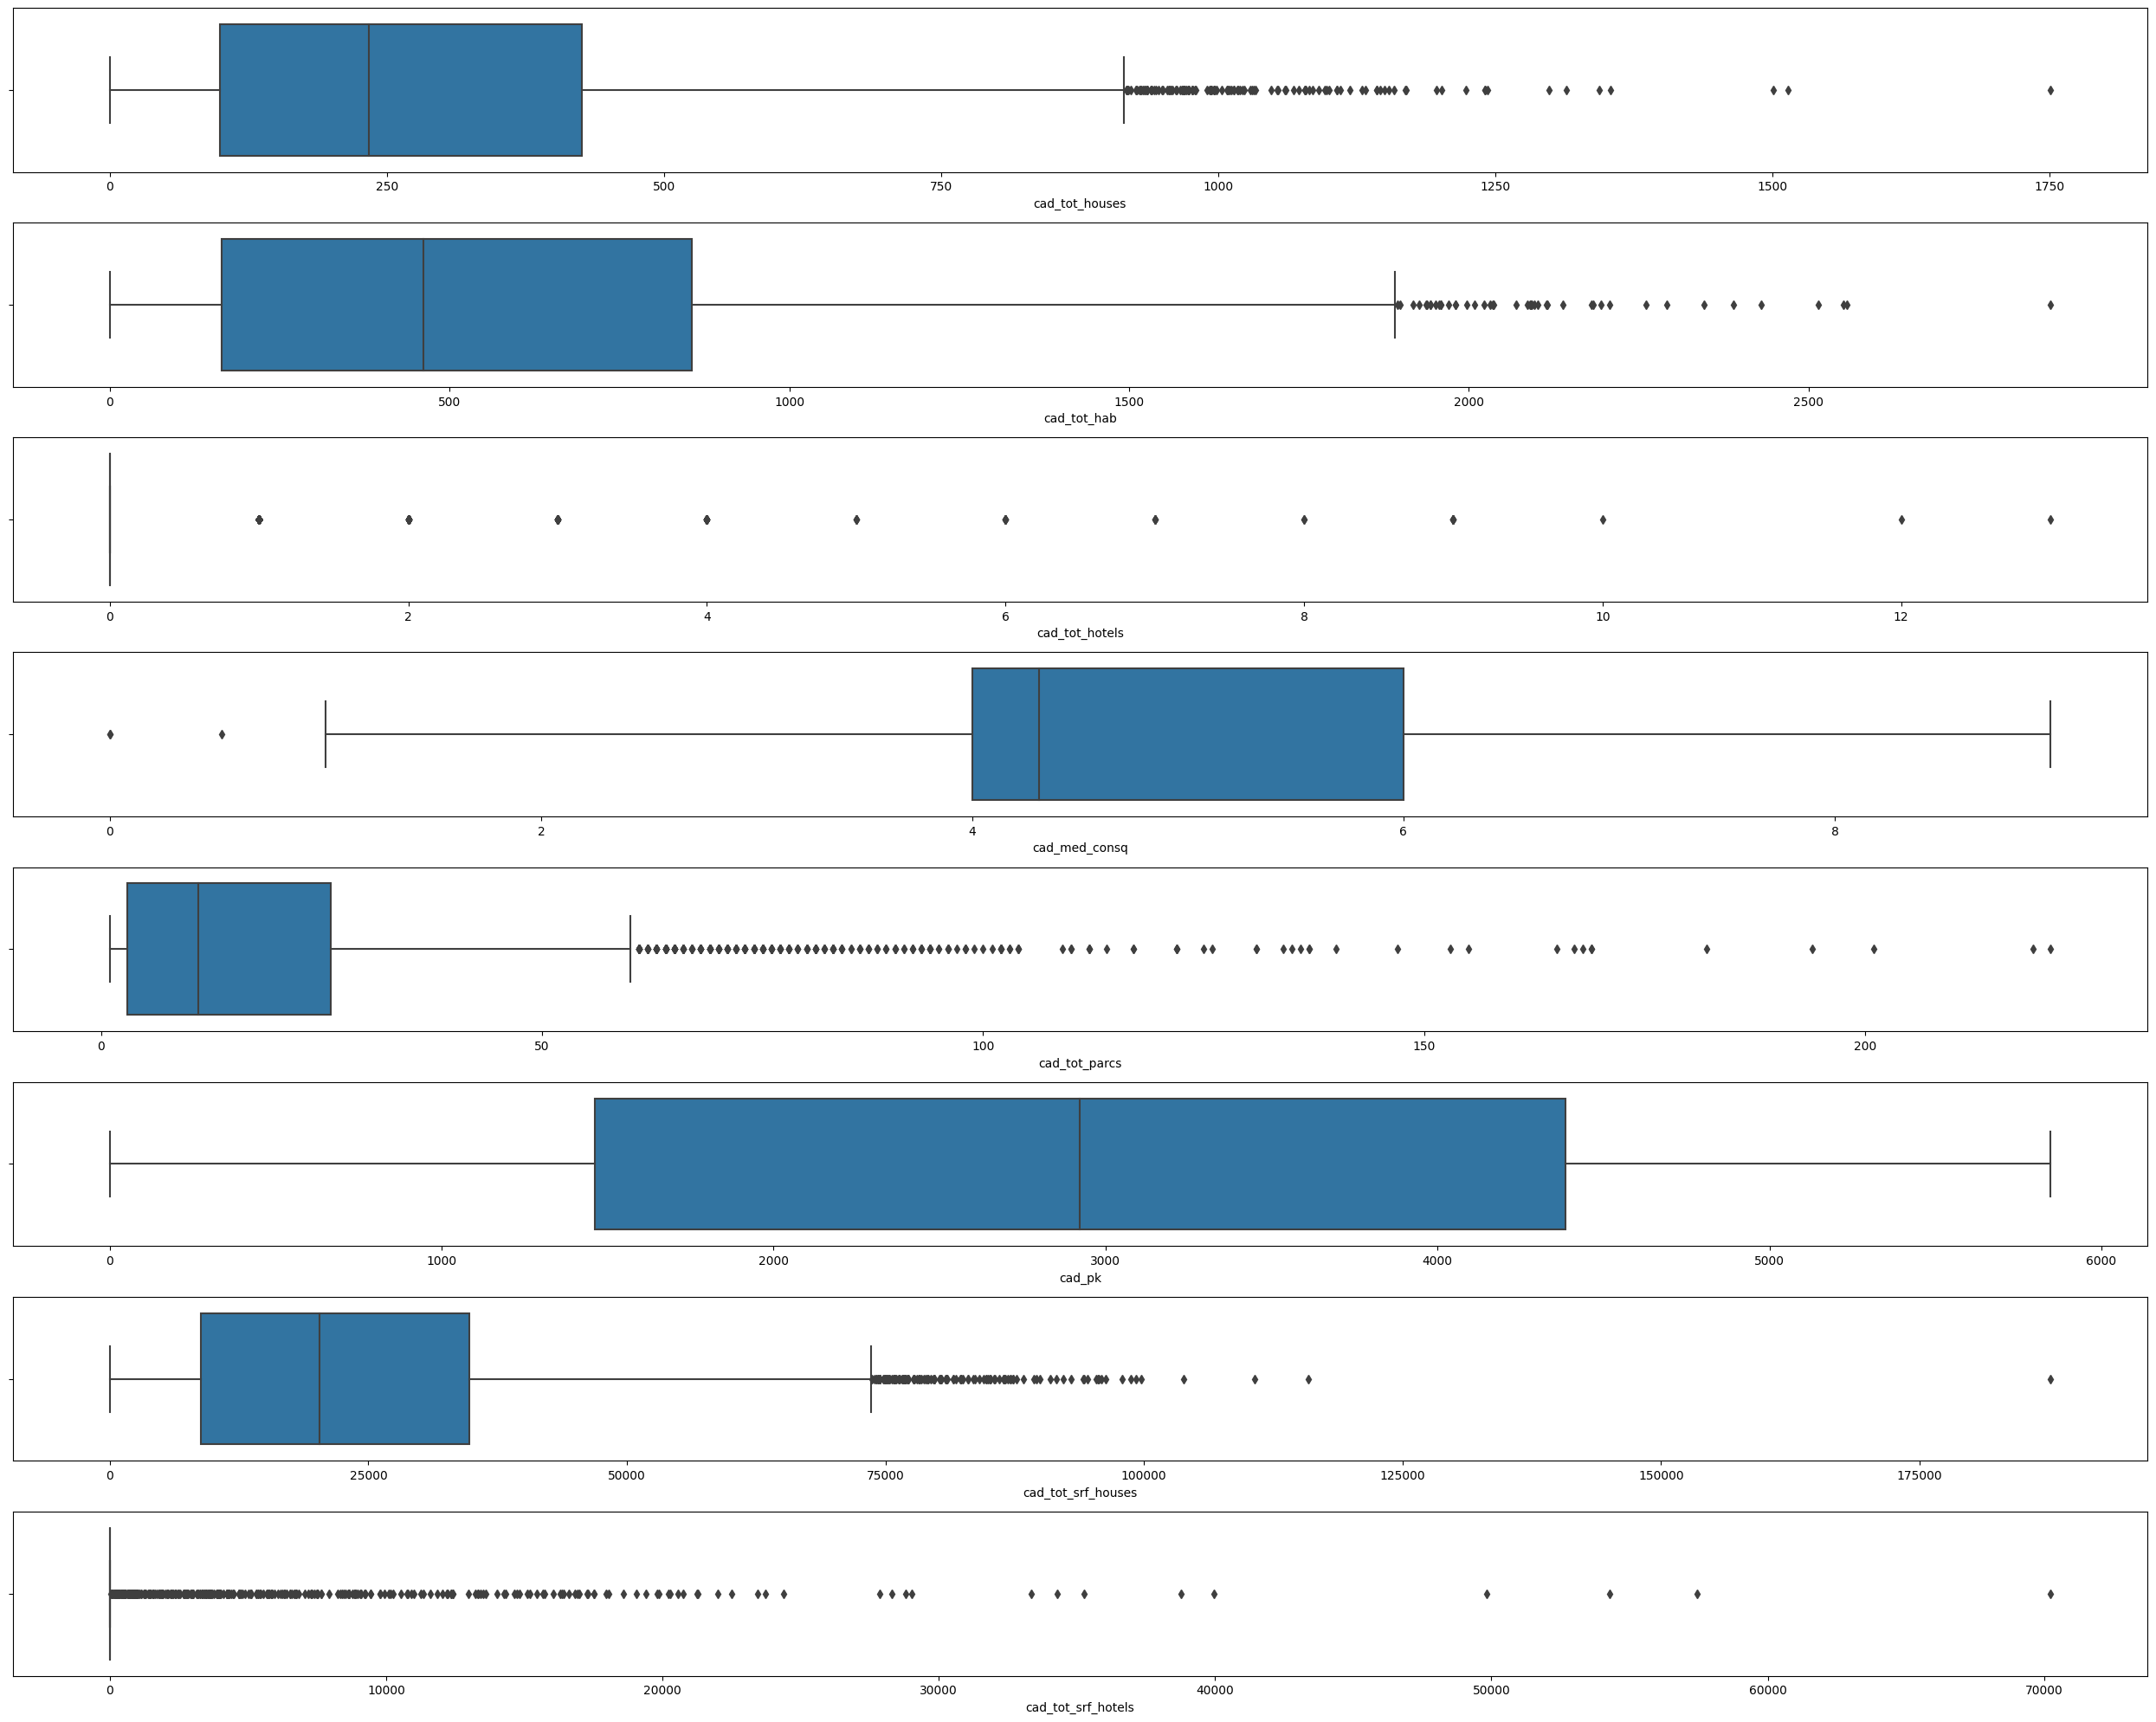

In [7]:
sc.chart_boxplot(df[cols_catastro])

In [8]:
df[cols_catastro].head()

,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
0,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0
1,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0
2,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0
3,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0
4,33.0,11.0,0.0,4.00000,1.0,4882.0,4256.0,0.0


the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.

# variables de fotocasa

In [9]:
cols_fotocasa = scl.columnList(df, 'fc_')

the columns that have fc_ on their name are: ['fc_tot_offer', 'fc_tot_owners', 'fc_avg_price', 'rn_fc_med_price', 'rn_fc_max_price', 'rn_fc_offer', 'rn_fc_min_price', 'rn_fc_avg_price', 'rn_fc_tot_price']


numeric variables distribution


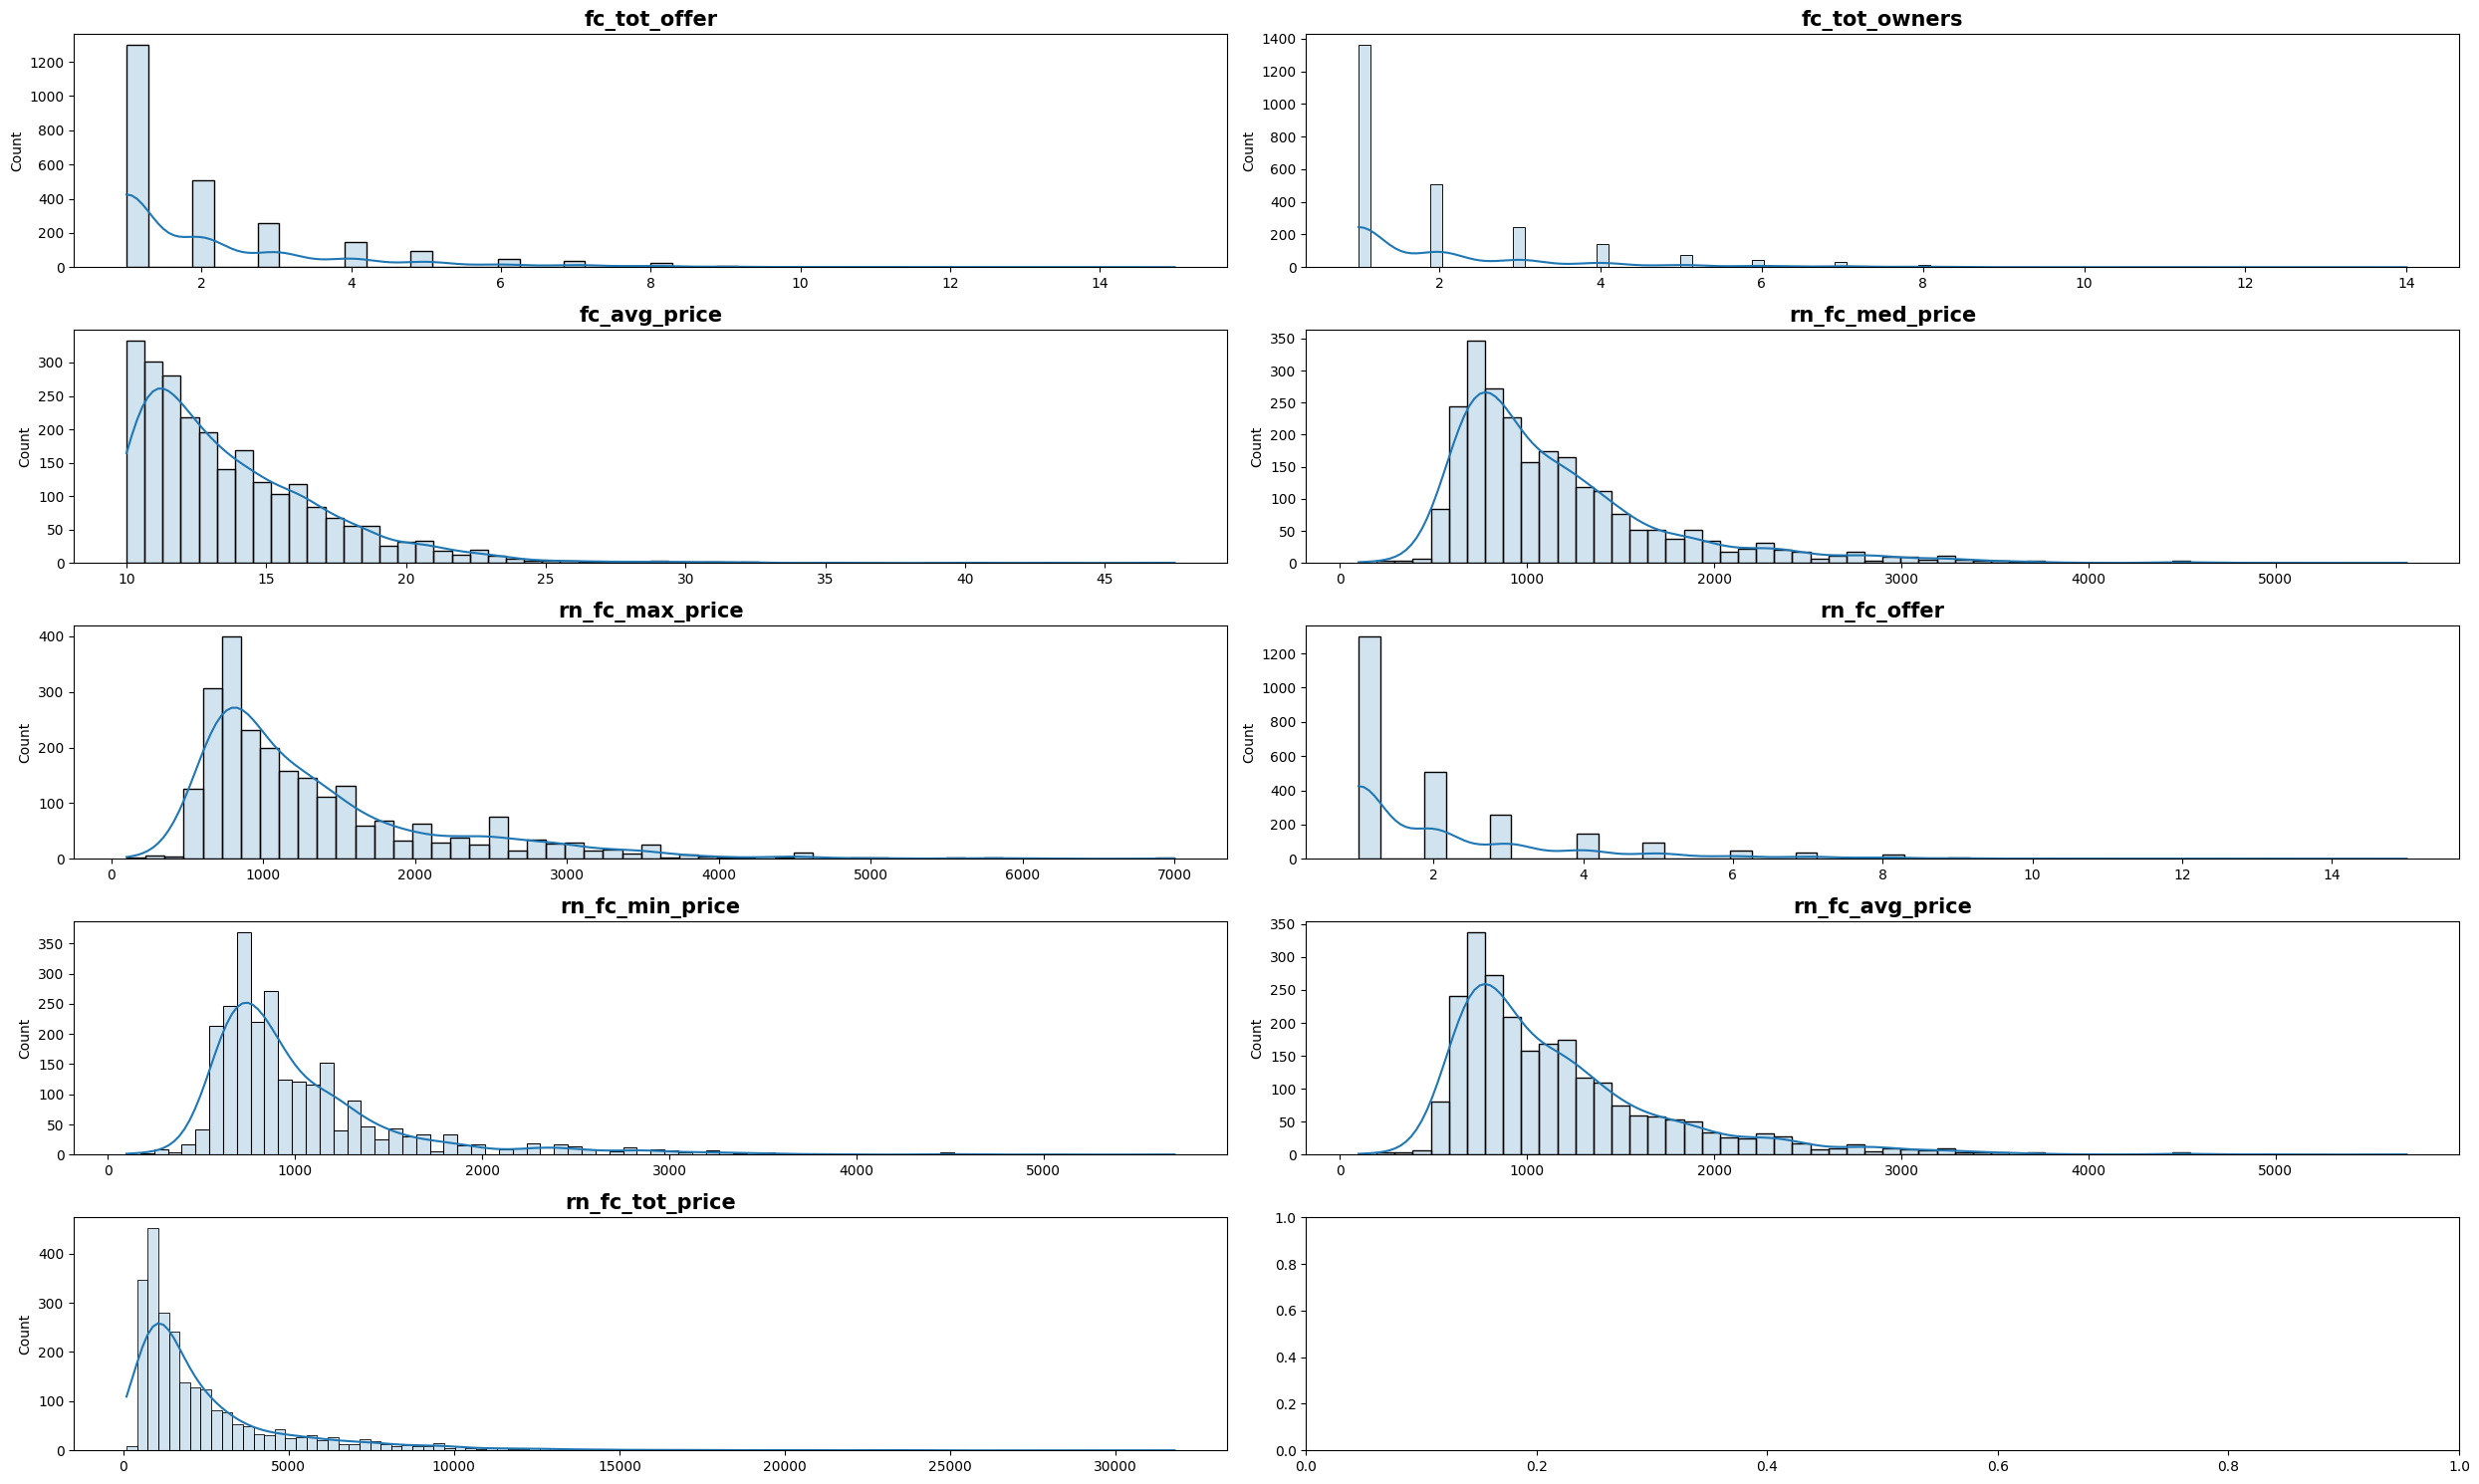

In [10]:
sc.distribucion_numericas(df[cols_fotocasa])

numeric variables distribution -> outliers


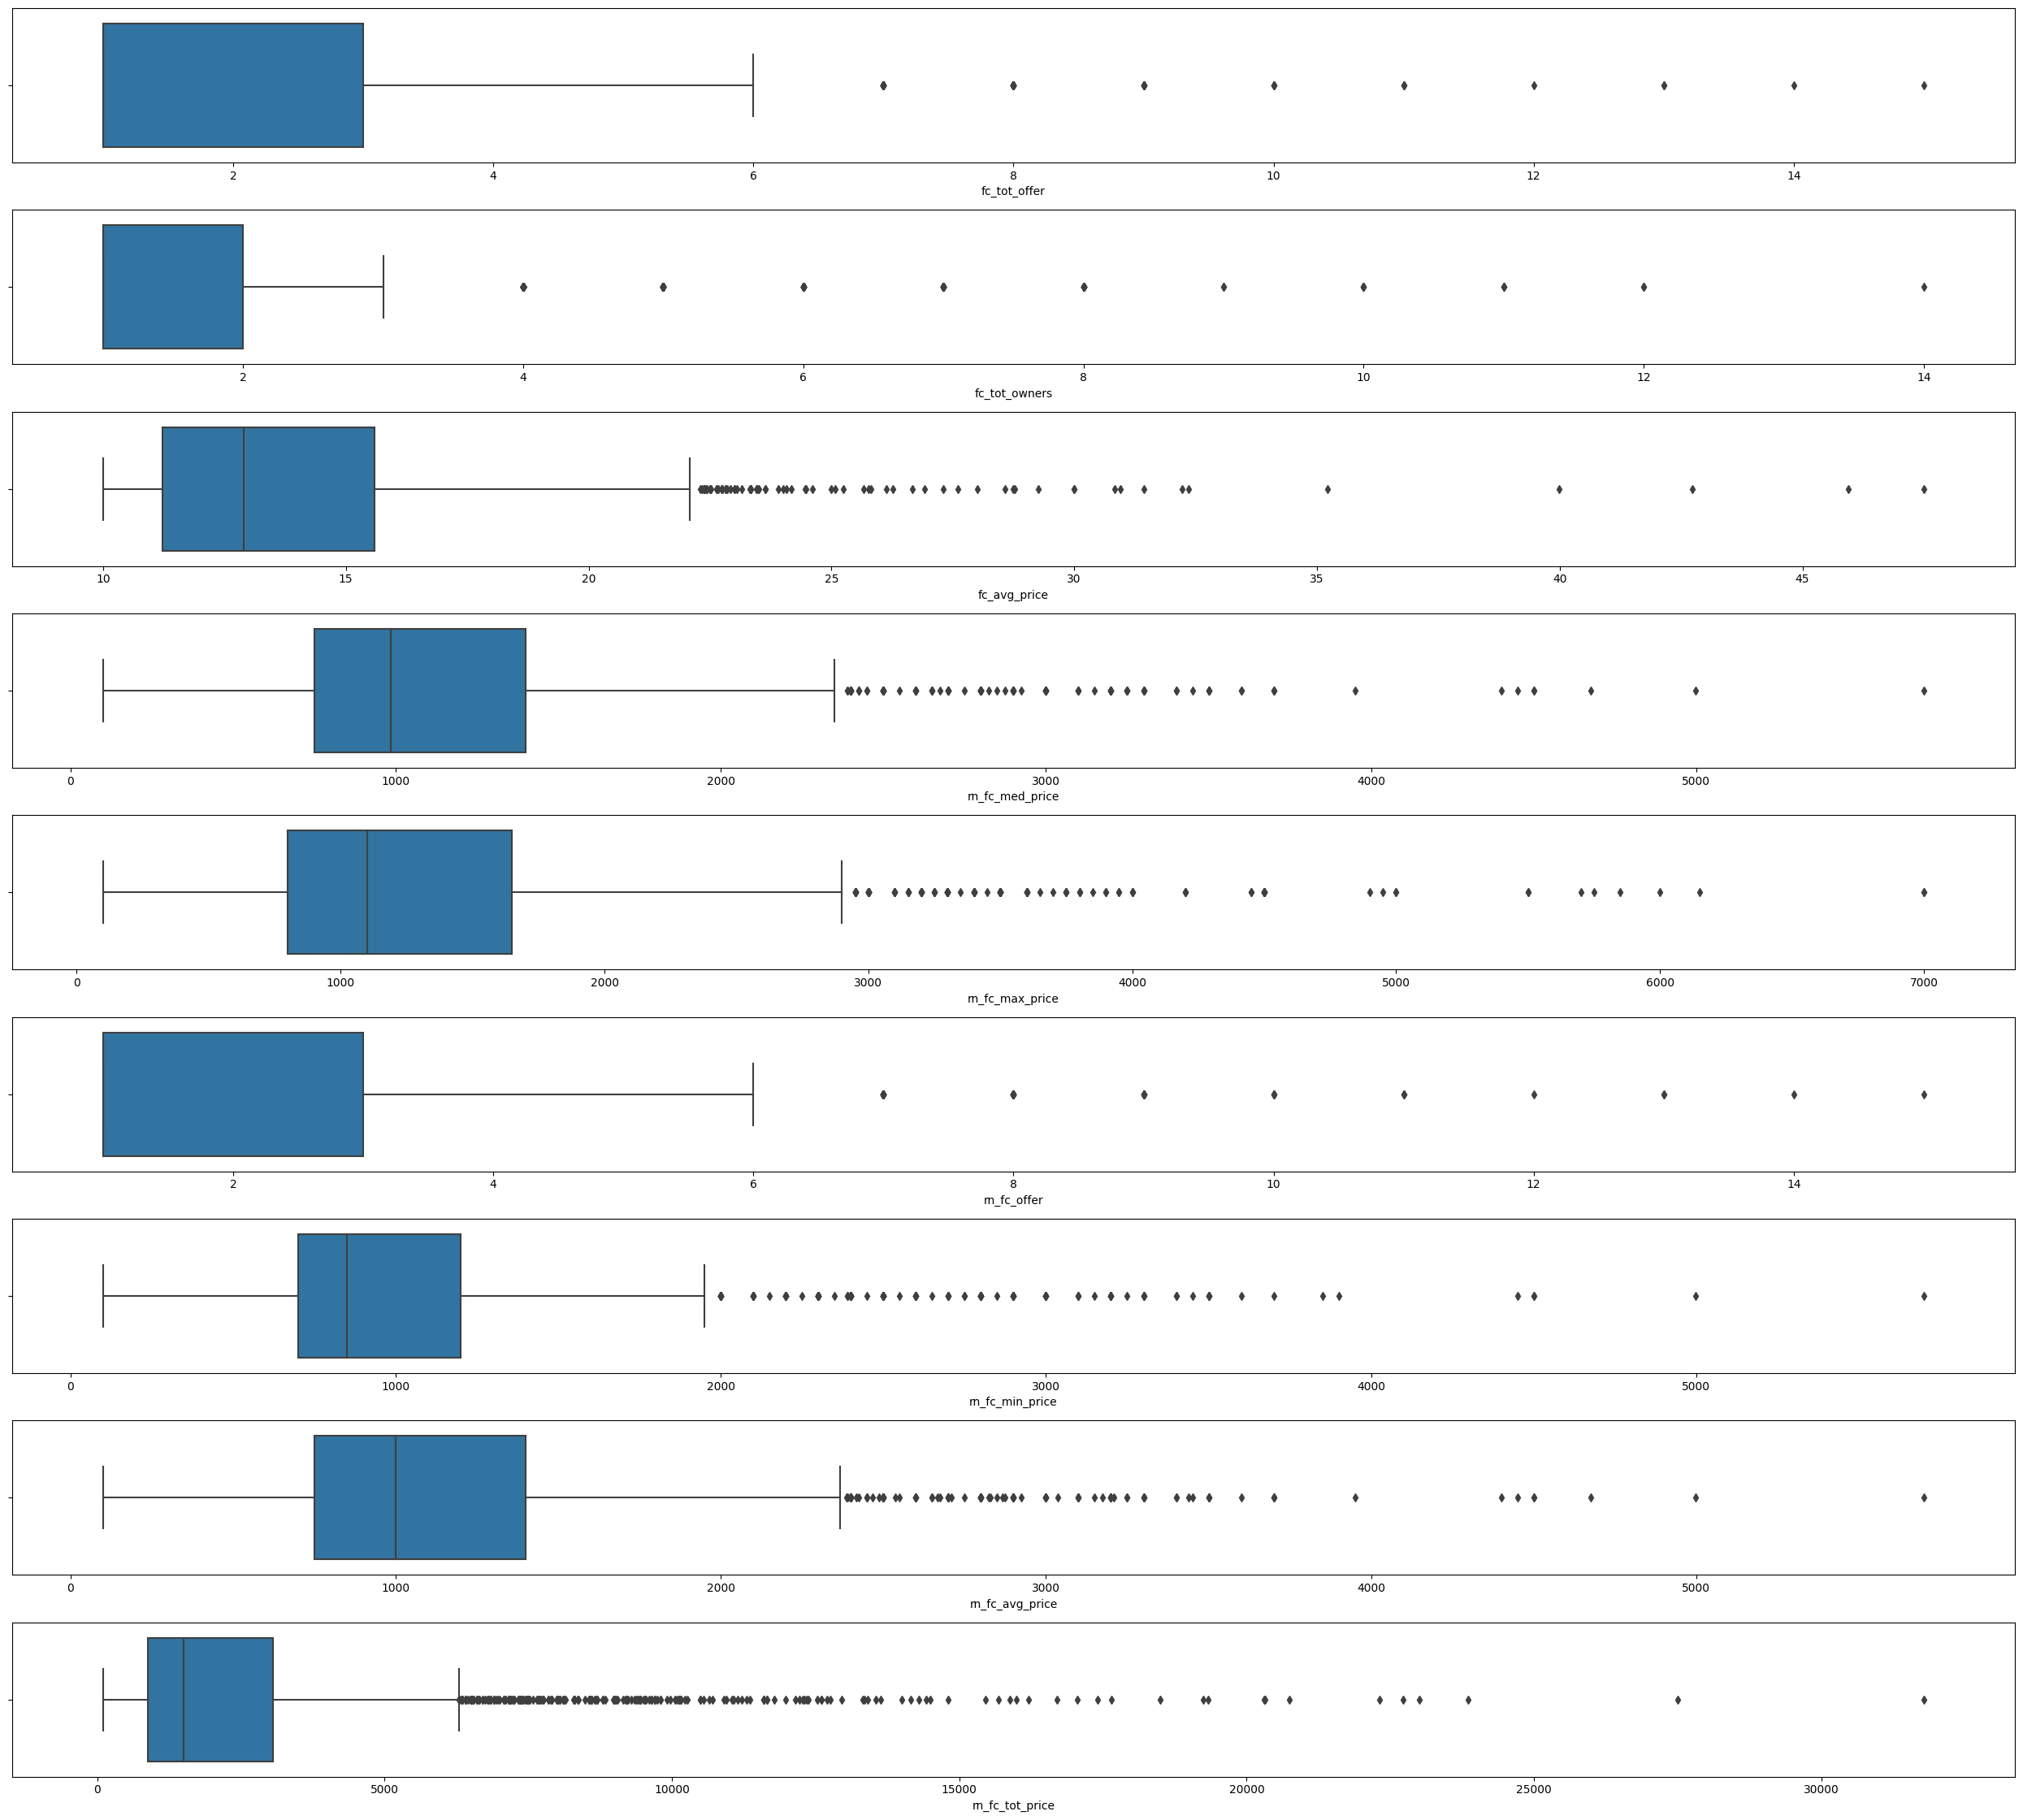

In [11]:
sc.chart_boxplot(df[cols_fotocasa])

In [12]:
sc.analisis_basico(df[cols_fotocasa])

_________________________________

1_Data Structure: (12310, 9)


,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_fc_min_price,rn_fc_avg_price,rn_fc_tot_price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fc_tot_offer     2430 non-null   float64
 1   fc_tot_owners    2430 non-null   float64
 2   fc_avg_price     2430 non-null   float64
 3   rn_fc_med_price  2430 non-null   float64
 4   rn_fc_max_price  2430 non-null   float64
 5   rn_fc_offer      2430 non-null   float64
 6   rn_fc_min_price  2430 non-null   float64
 7   rn_fc_avg_price  2430 non-null   float64
 8   rn_fc_tot_price  2430 non-null   float64
dtypes: float64(9)
memory usage: 865.7 KB


None

_________________________________

2_Duplicated columns:
10430
_________________________________

3_Null values distribution:


,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_fc_min_price,rn_fc_avg_price,rn_fc_tot_price
nulos,9880,9880,9880,9880,9880,9880,9880,9880,9880
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_fc_min_price,rn_fc_avg_price,rn_fc_tot_price
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,2.090123,1.971605,13.840803,1166.326543,1366.224691,2.090123,1034.009053,1182.090159,2629.842387
std,1.702837,1.554425,3.628931,603.655959,839.009251,1.702837,551.179200,605.803317,2932.587574
min,1.000000,1.000000,10.000000,100.000000,100.000000,1.000000,100.000000,100.000000,100.000000
25%,1.000000,1.000000,11.219905,750.000000,800.000000,1.000000,700.000000,750.000000,885.000000
50%,1.000000,1.000000,12.894465,983.750000,1100.000000,1.000000,850.000000,1000.000000,1500.000000
75%,3.000000,2.000000,15.593654,1400.000000,1650.000000,3.000000,1200.000000,1400.000000,3050.000000
max,15.000000,14.000000,47.500000,5700.000000,7000.000000,15.000000,5700.000000,5700.000000,31785.000000


_________________________________

5_Categorical variables distribution:
No categoriacal variables available, sorry :)


the variables that come from Fotocasa, the real estate portal are:
- `fc_tot_offer` 
- `fc_tot_owners`
- `fc_avg_price` - avg listed price
<br>
- `rn_fc_med_price` 
- `rn_fc_max_price`
- `rn_fc_offer`
- `rn_fc_min_price`
- `rn_fc_avg_price`
- `rn_fc_tot_price`

as we've seen above, there are a lot of null values, so we will try to replace this variable by another one in order to be able to compare.

# variables airbnb

In [13]:
cols_catastro = scl.columnList(df, 'cad_')

the columns that have cad_ on their name are: ['cad_tot_houses', 'cad_tot_hab', 'cad_tot_hotels', 'cad_med_consq', 'cad_tot_parcs', 'cad_pk', 'cad_tot_srf_houses', 'cad_tot_srf_hotels']


numeric variables distribution


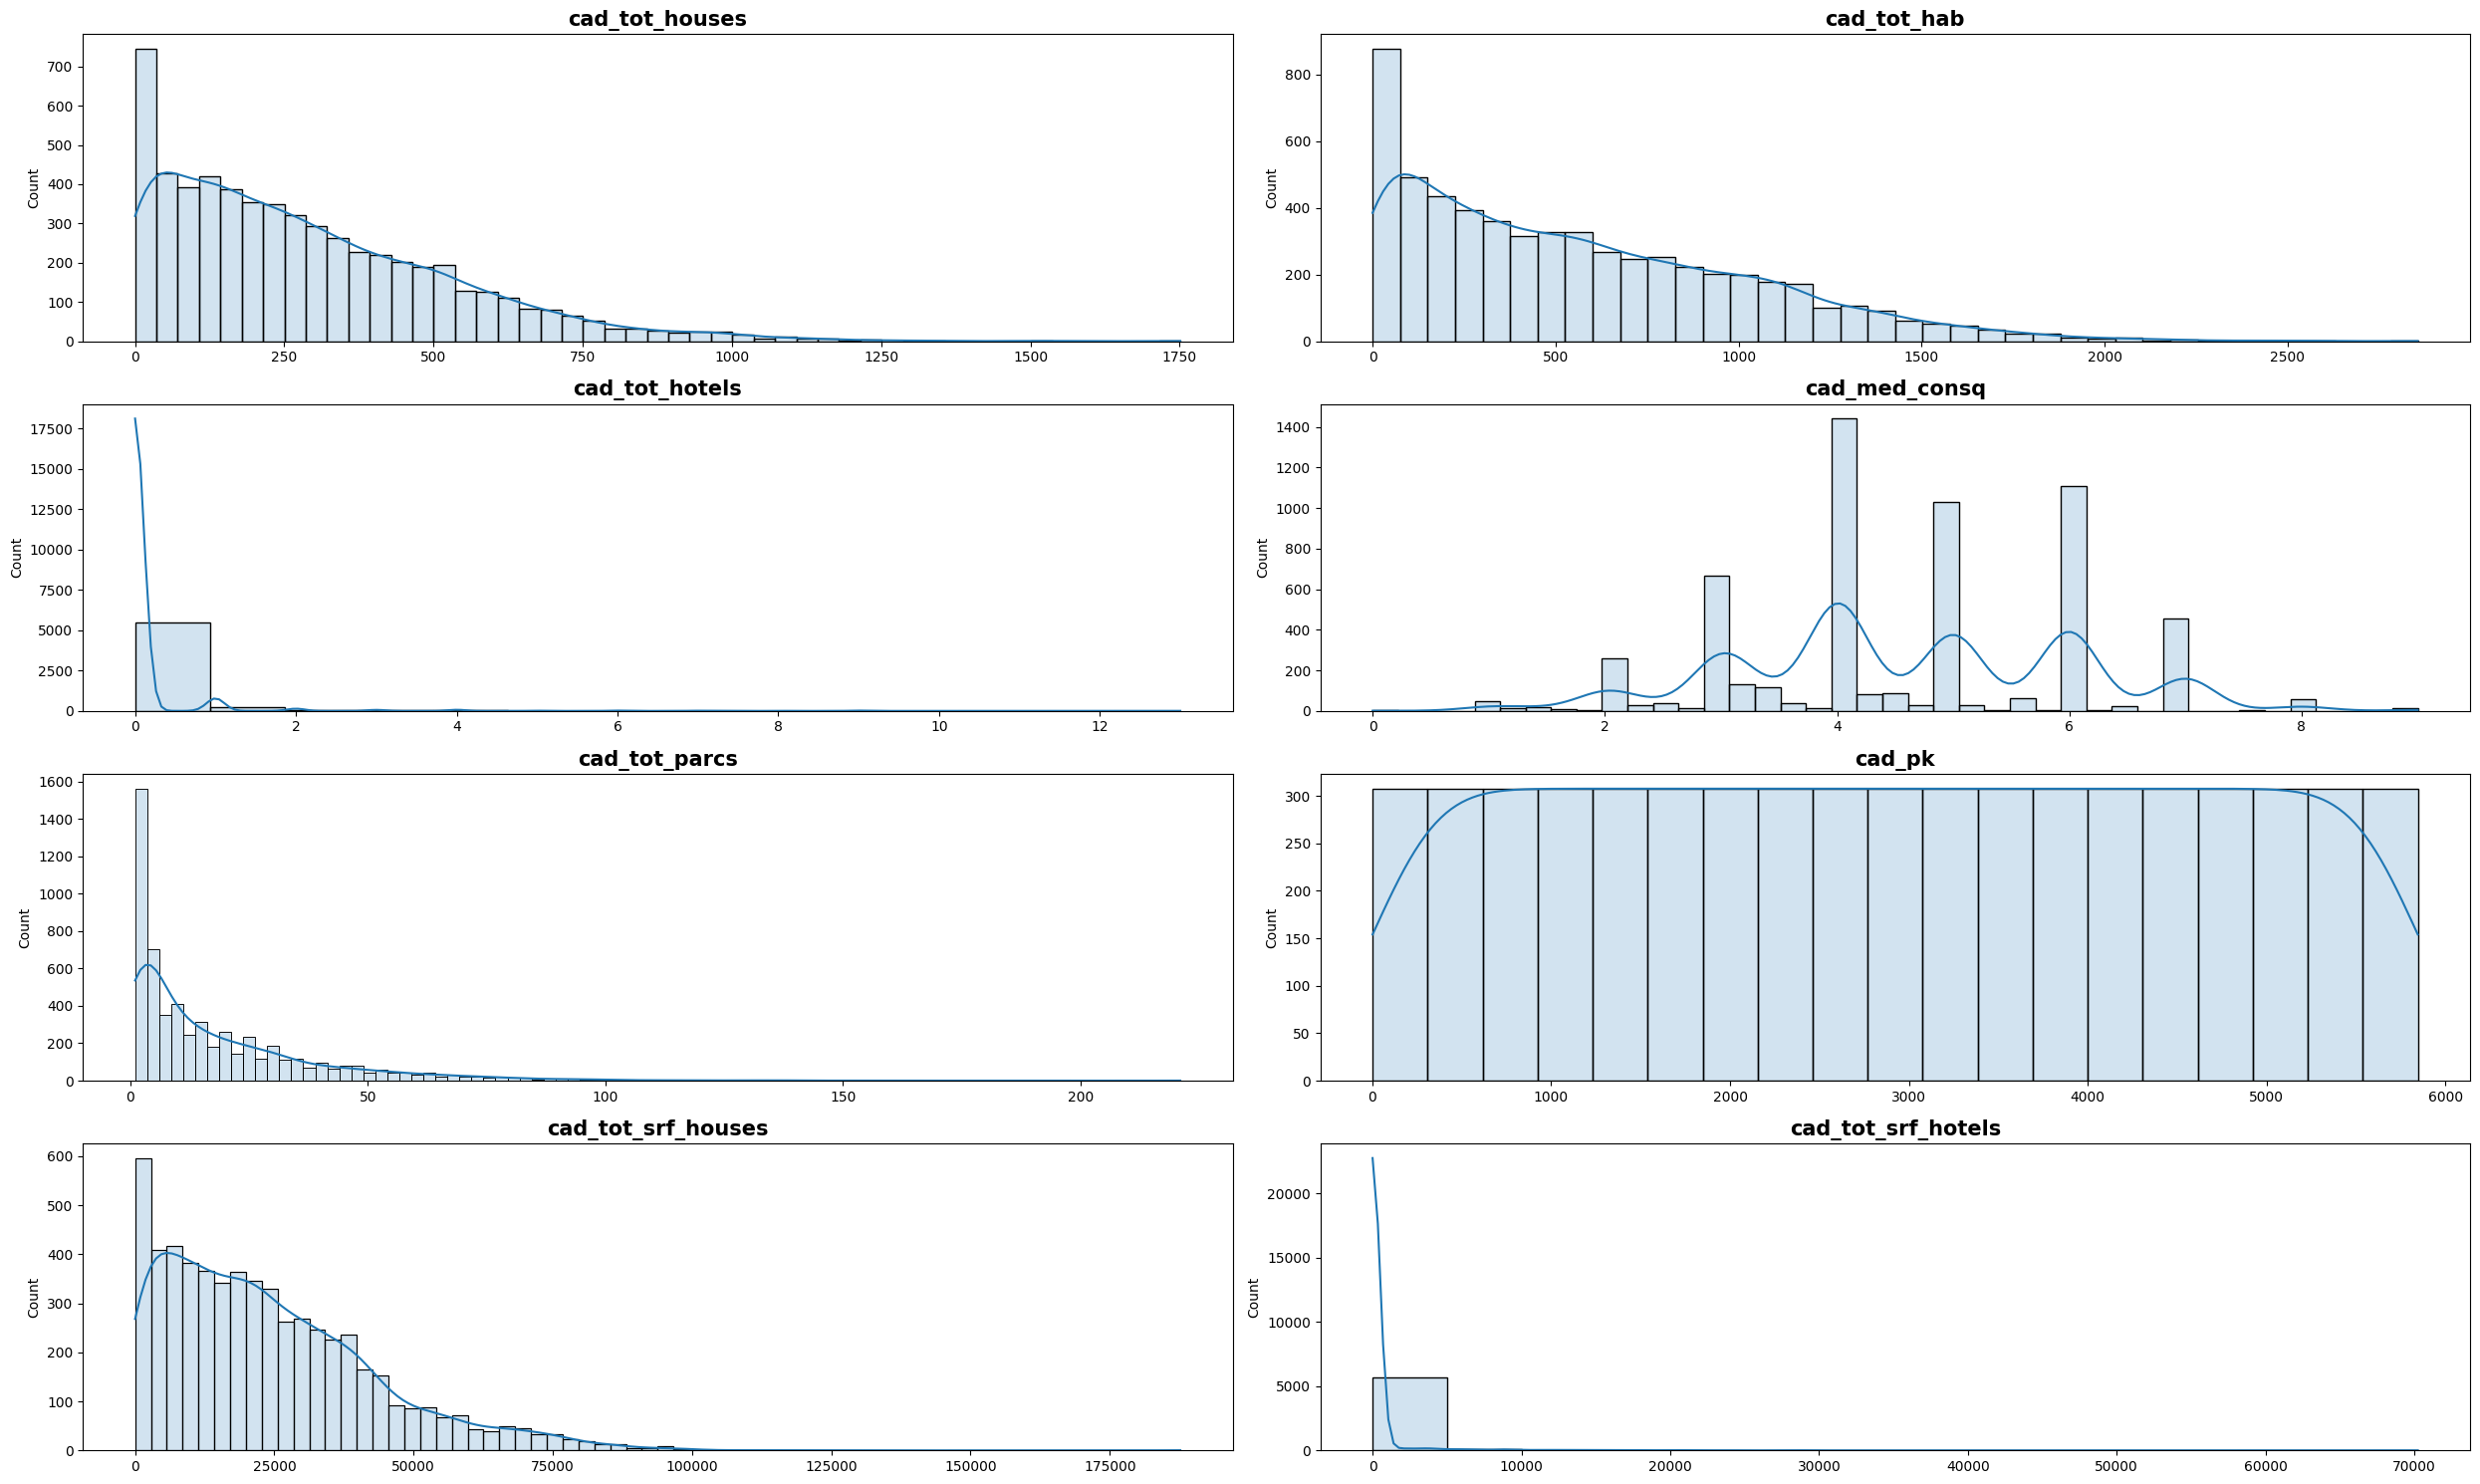

In [14]:
sc.distribucion_numericas(df[cols_catastro])

numeric variables distribution -> outliers


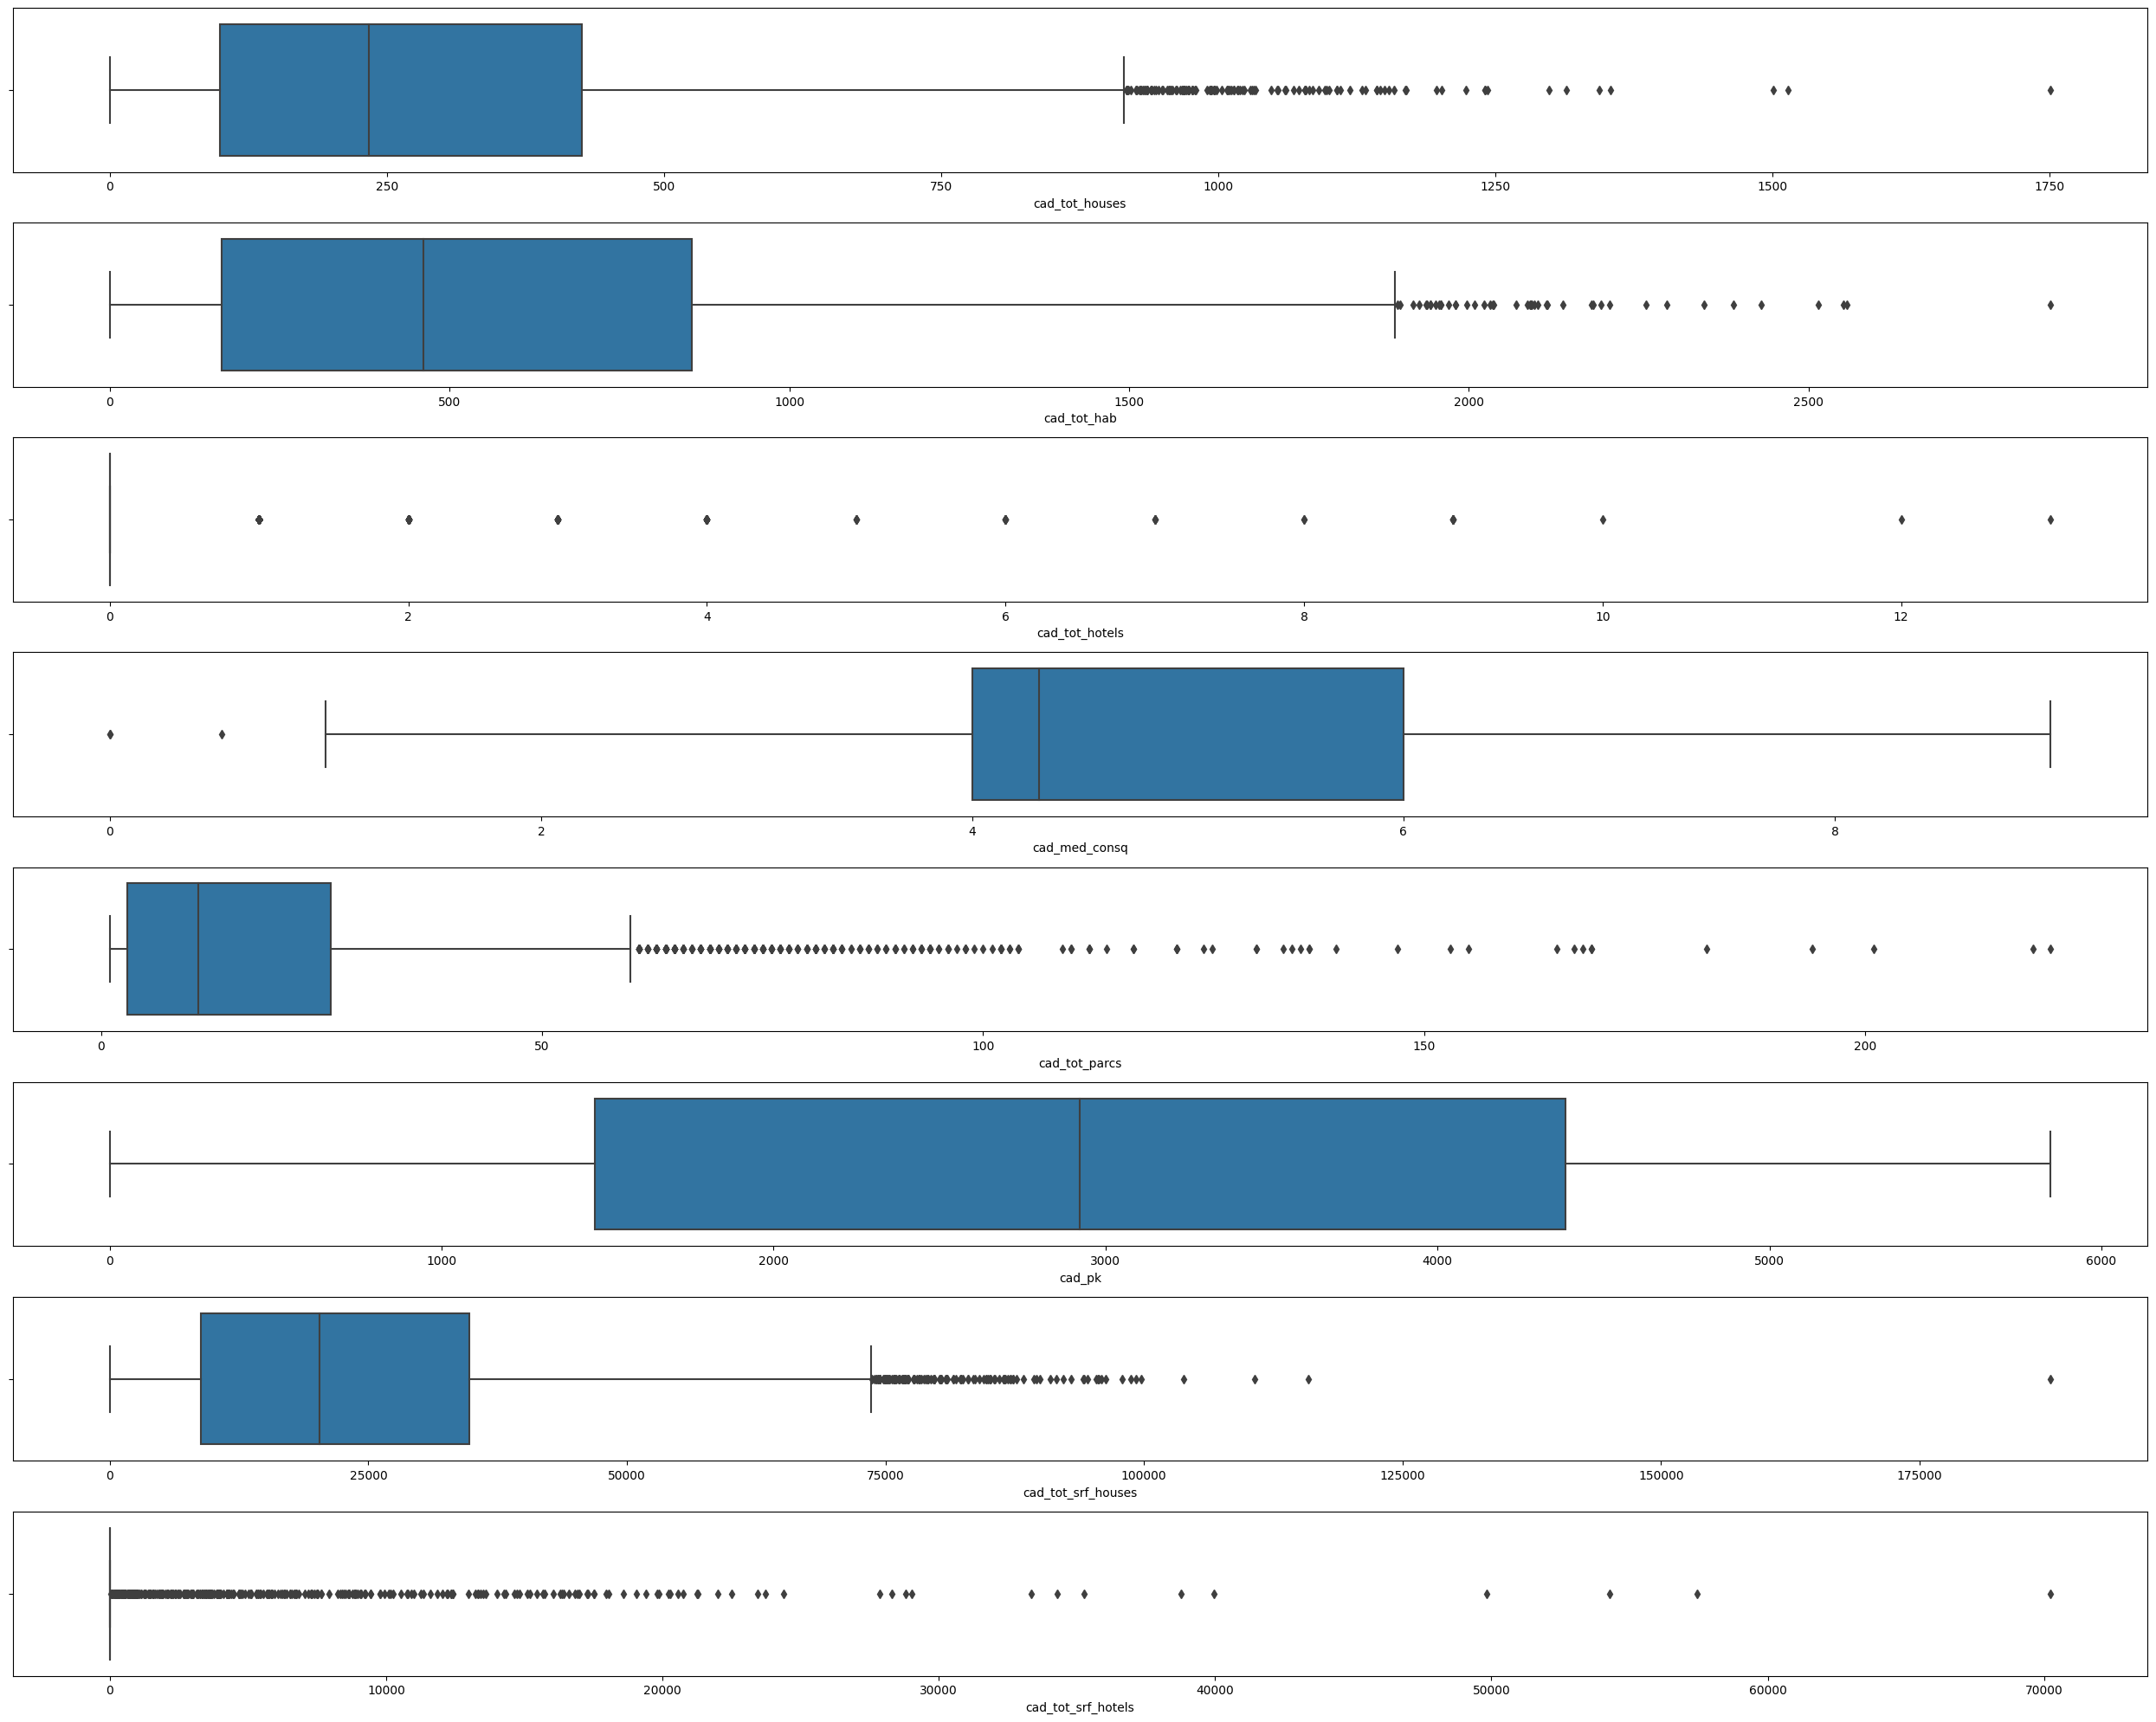

In [15]:
sc.chart_boxplot(df[cols_catastro])

In [16]:
df[cols_catastro].head()

,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
0,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0
1,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0
2,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0
3,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0
4,33.0,11.0,0.0,4.00000,1.0,4882.0,4256.0,0.0


the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.

# variables flickr

In [17]:
cols_catastro = scl.columnList(df, 'cad_')

the columns that have cad_ on their name are: ['cad_tot_houses', 'cad_tot_hab', 'cad_tot_hotels', 'cad_med_consq', 'cad_tot_parcs', 'cad_pk', 'cad_tot_srf_houses', 'cad_tot_srf_hotels']


numeric variables distribution


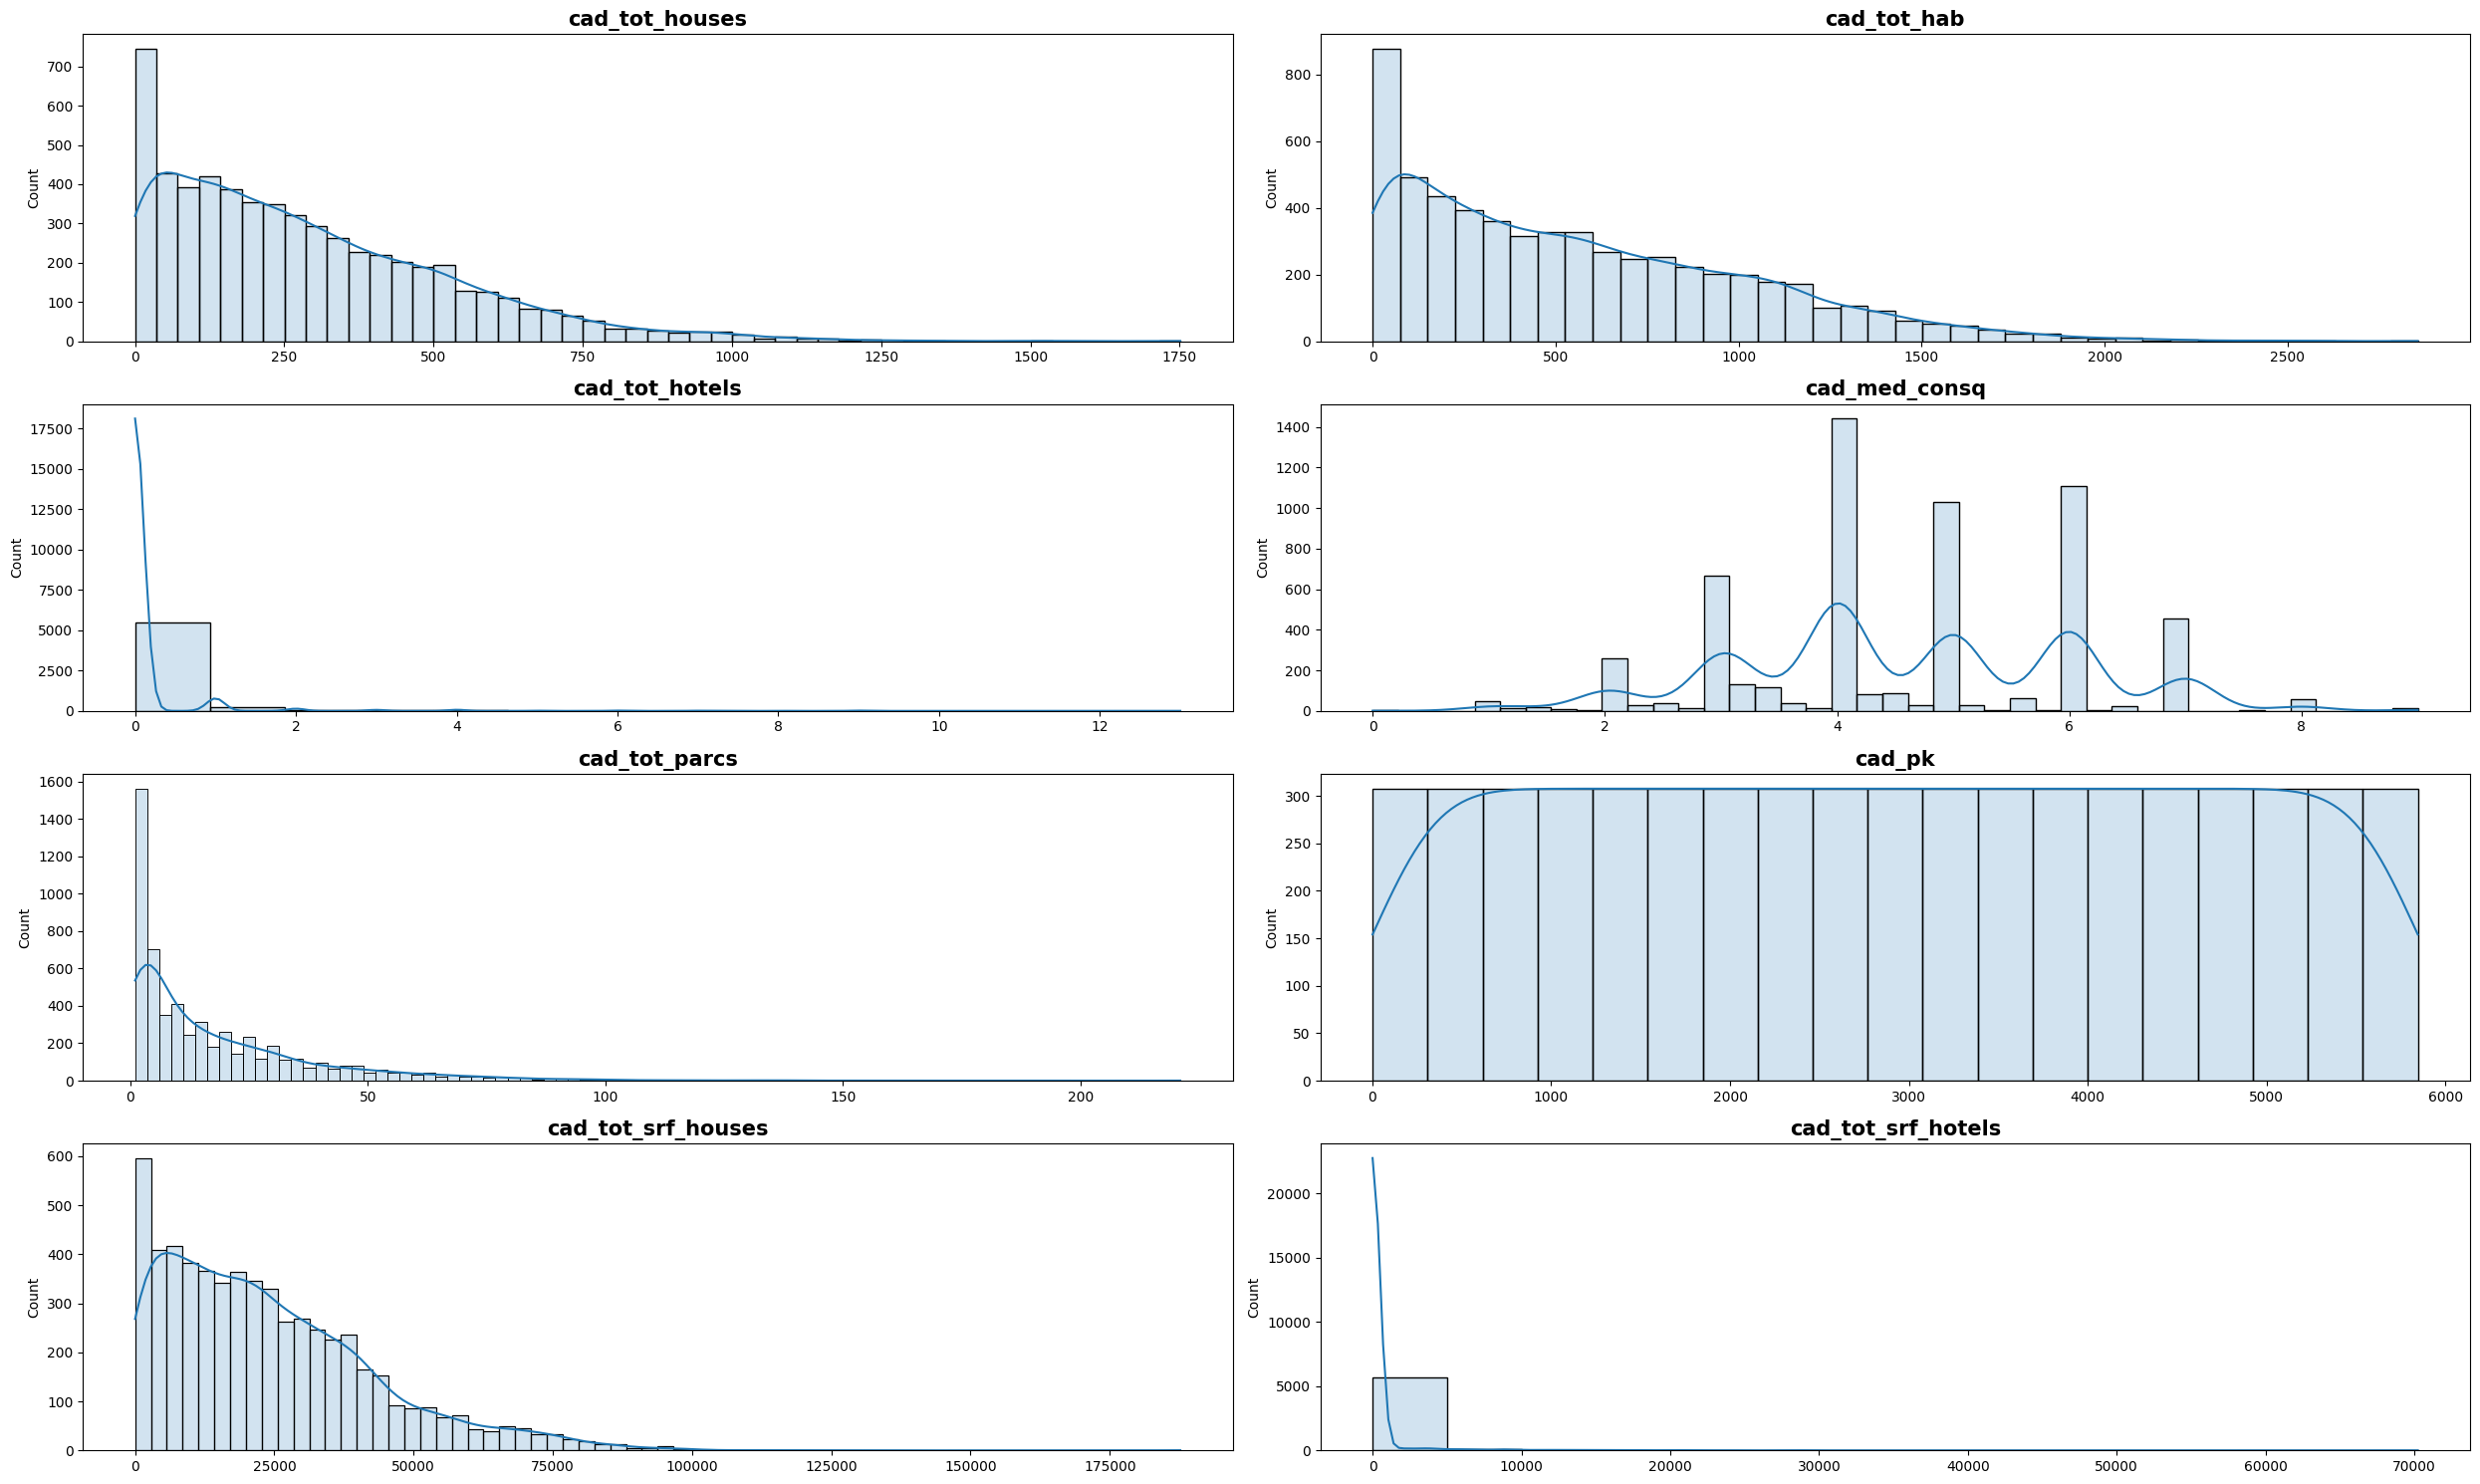

In [18]:
sc.distribucion_numericas(df[cols_catastro])

numeric variables distribution -> outliers


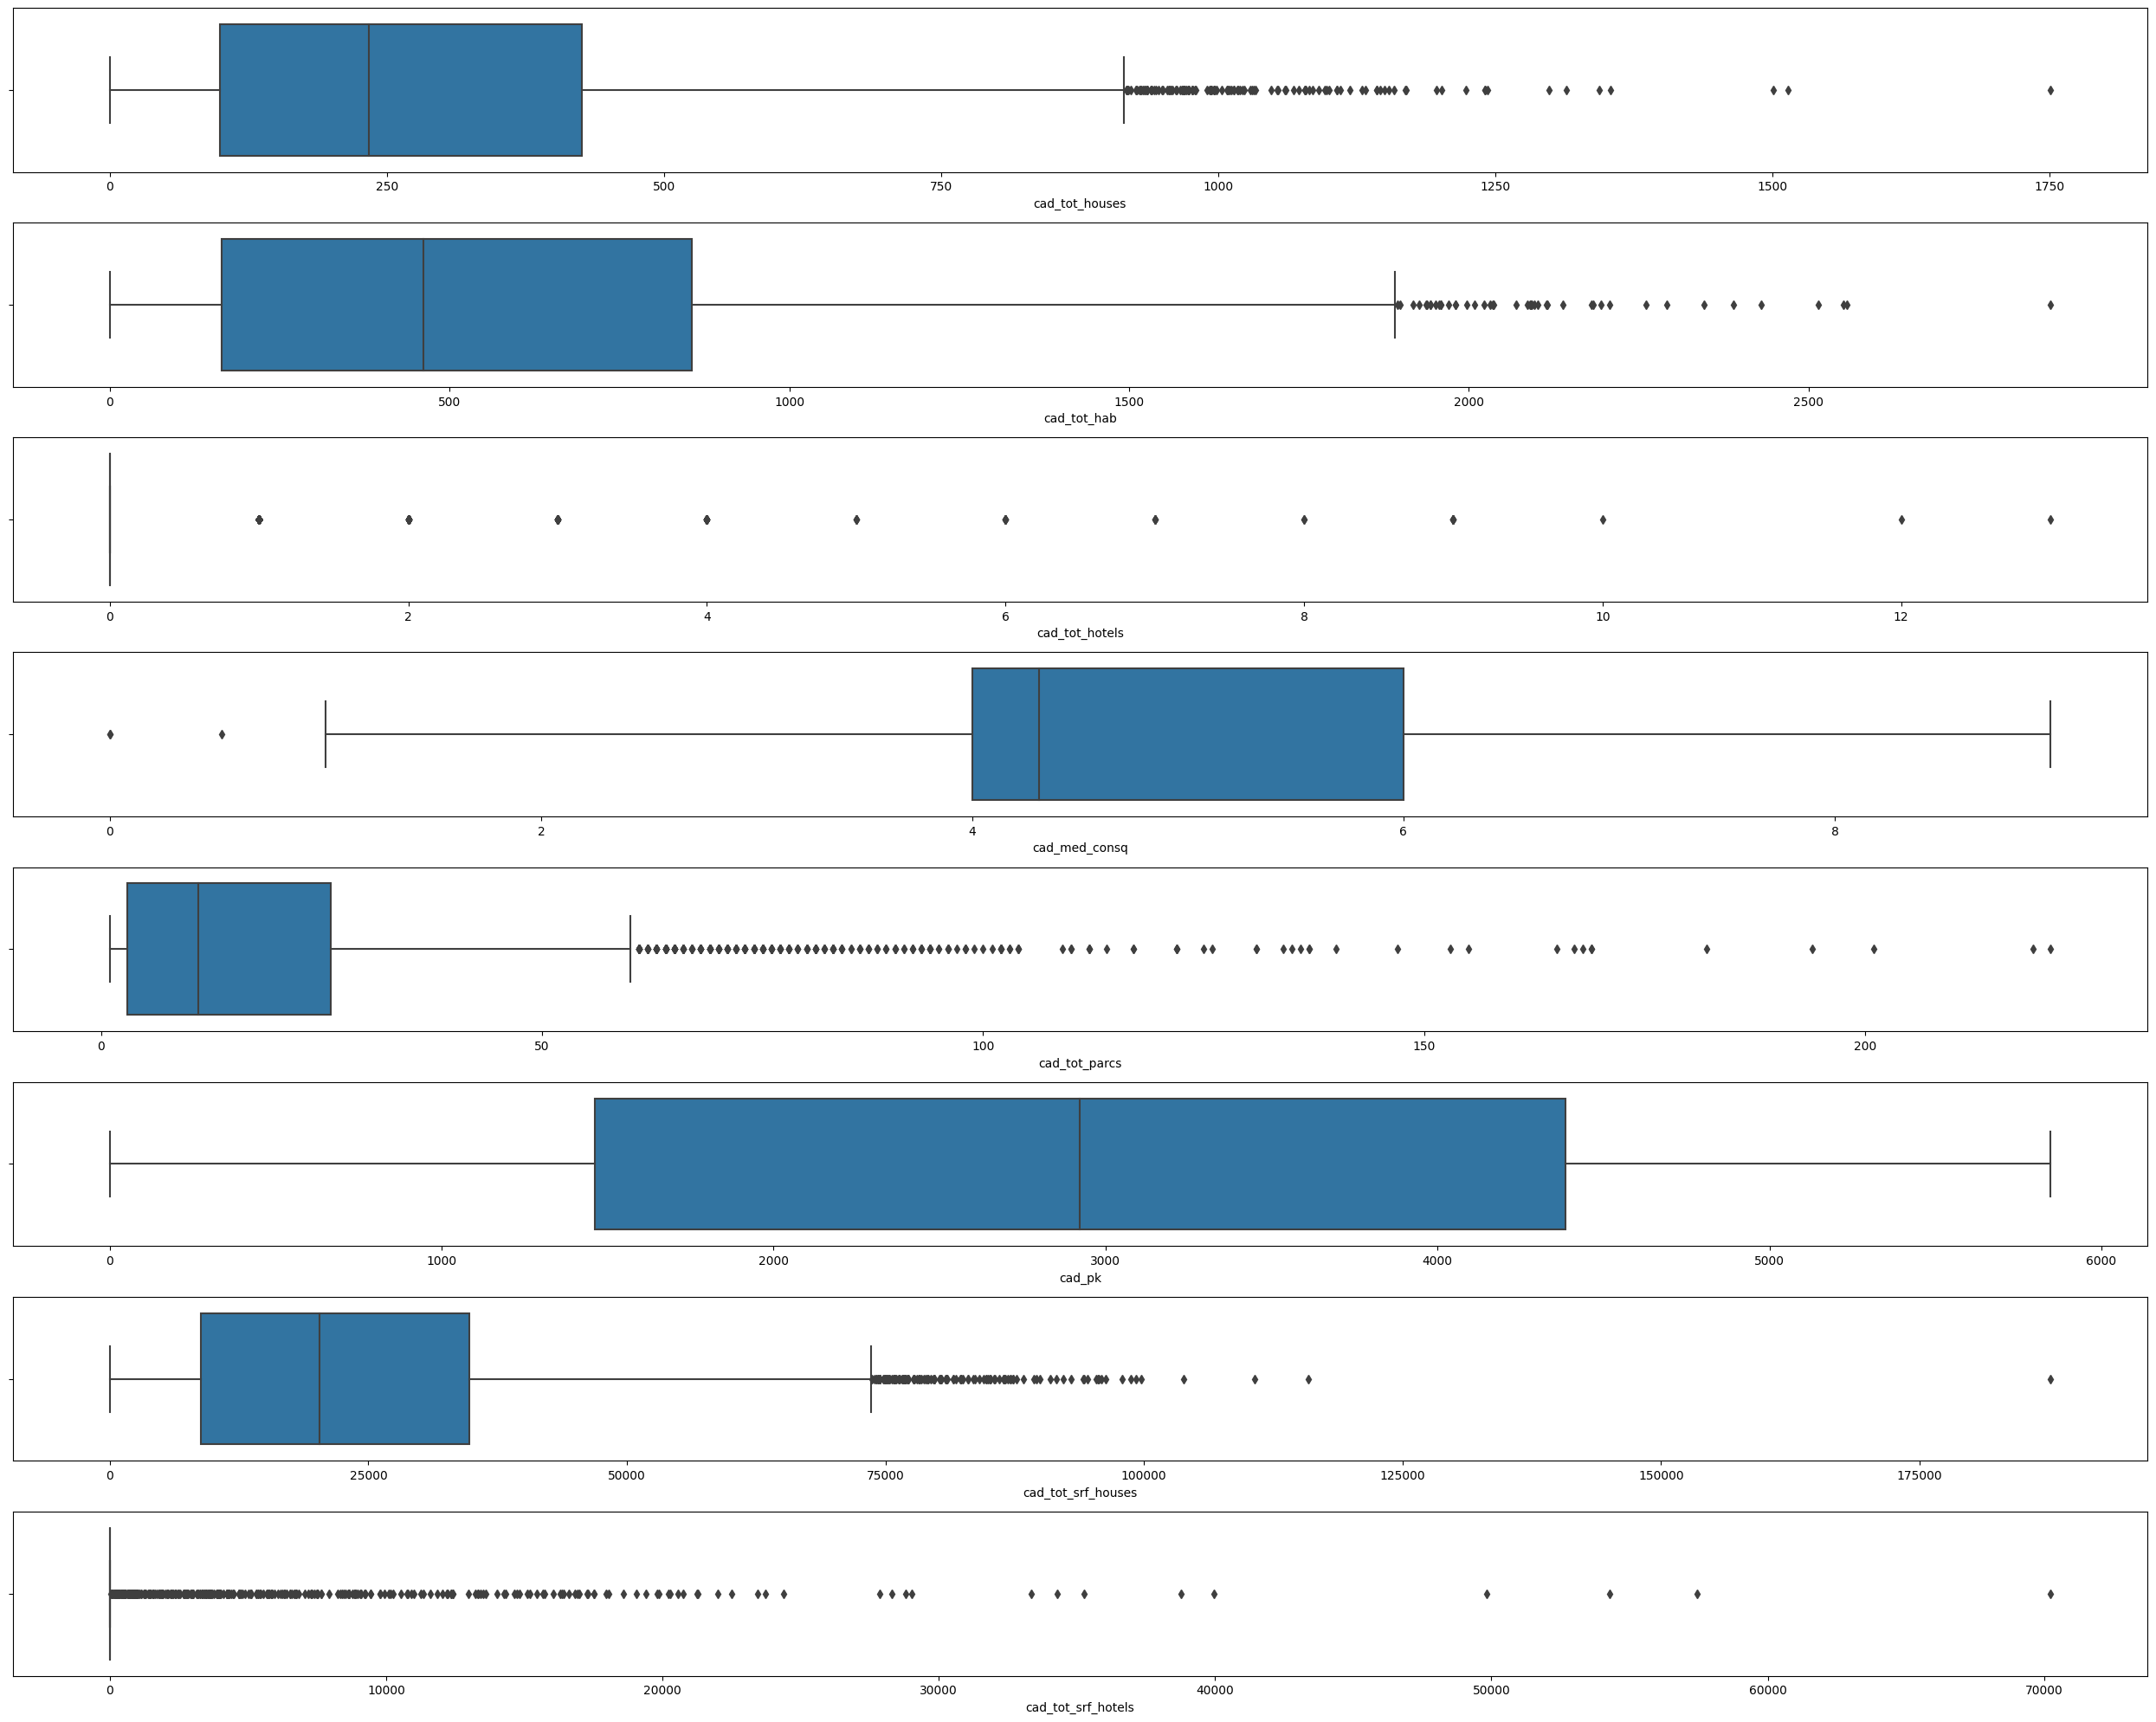

In [19]:
sc.chart_boxplot(df[cols_catastro])

In [20]:
df[cols_catastro].head()

,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
0,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0
1,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0
2,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0
3,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0
4,33.0,11.0,0.0,4.00000,1.0,4882.0,4256.0,0.0


the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.

# variables hoteles

In [21]:
cols_catastro = scl.columnList(df, 'cad_')

the columns that have cad_ on their name are: ['cad_tot_houses', 'cad_tot_hab', 'cad_tot_hotels', 'cad_med_consq', 'cad_tot_parcs', 'cad_pk', 'cad_tot_srf_houses', 'cad_tot_srf_hotels']


numeric variables distribution


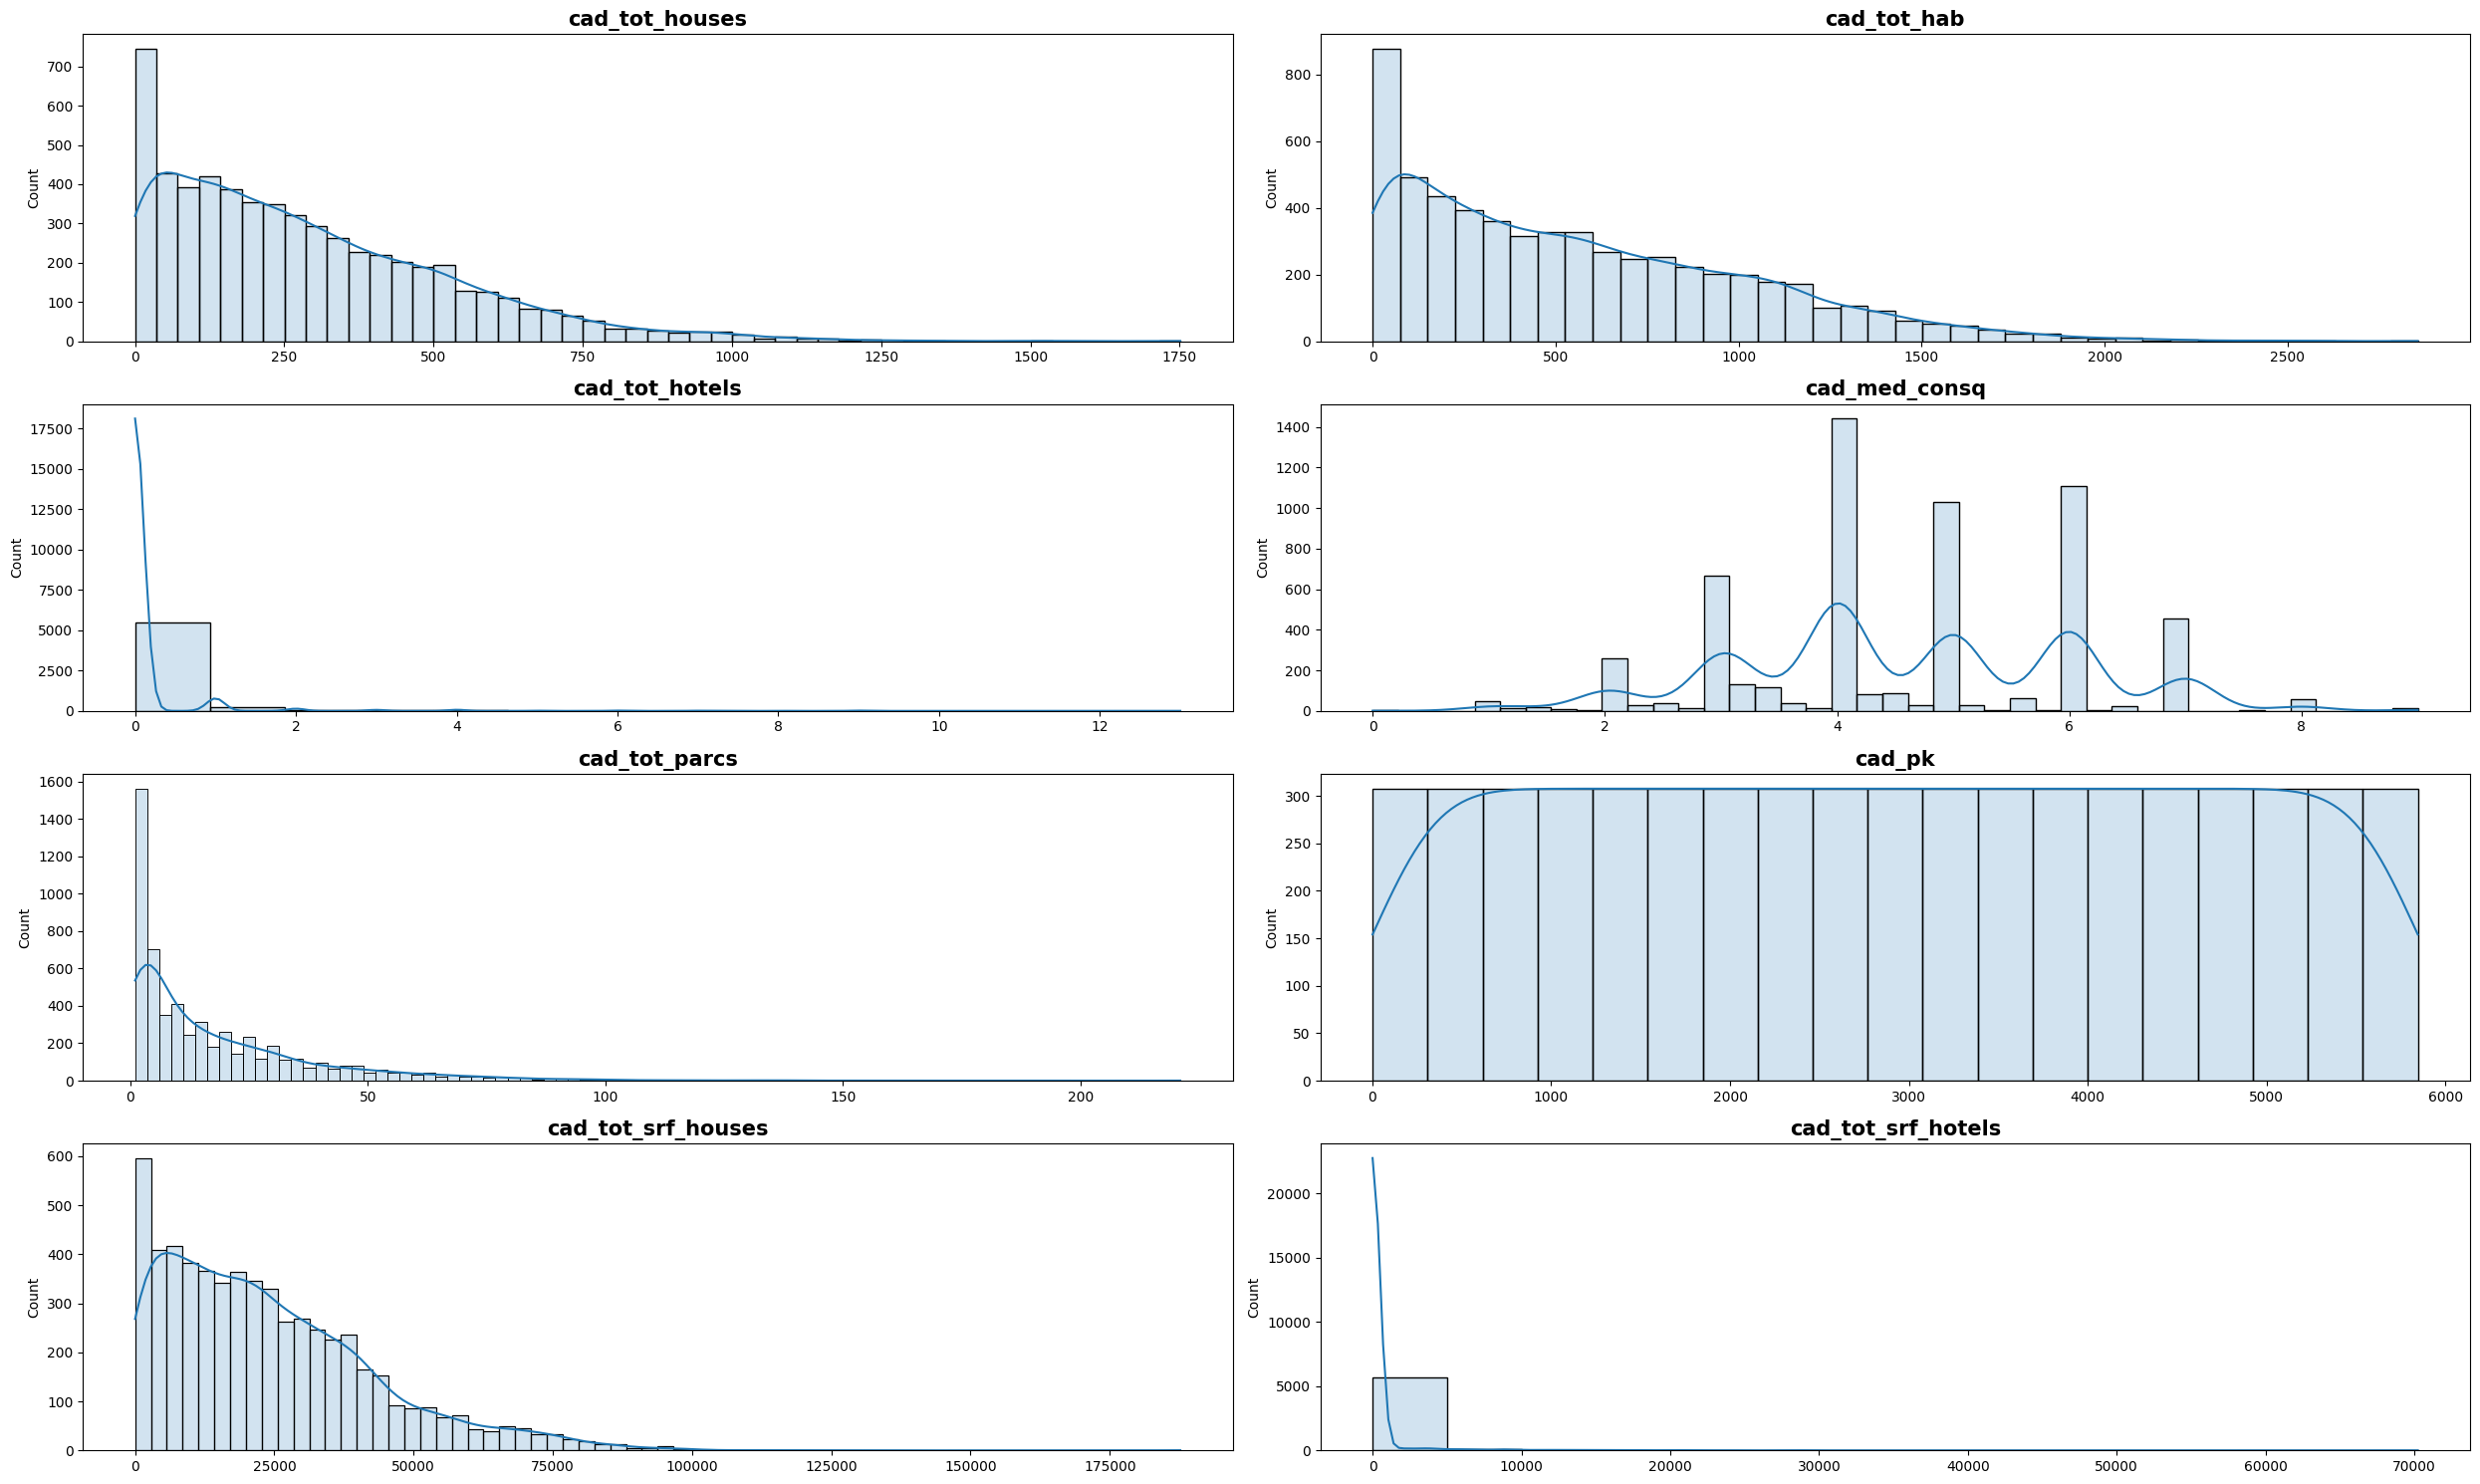

In [22]:
sc.distribucion_numericas(df[cols_catastro])

numeric variables distribution -> outliers


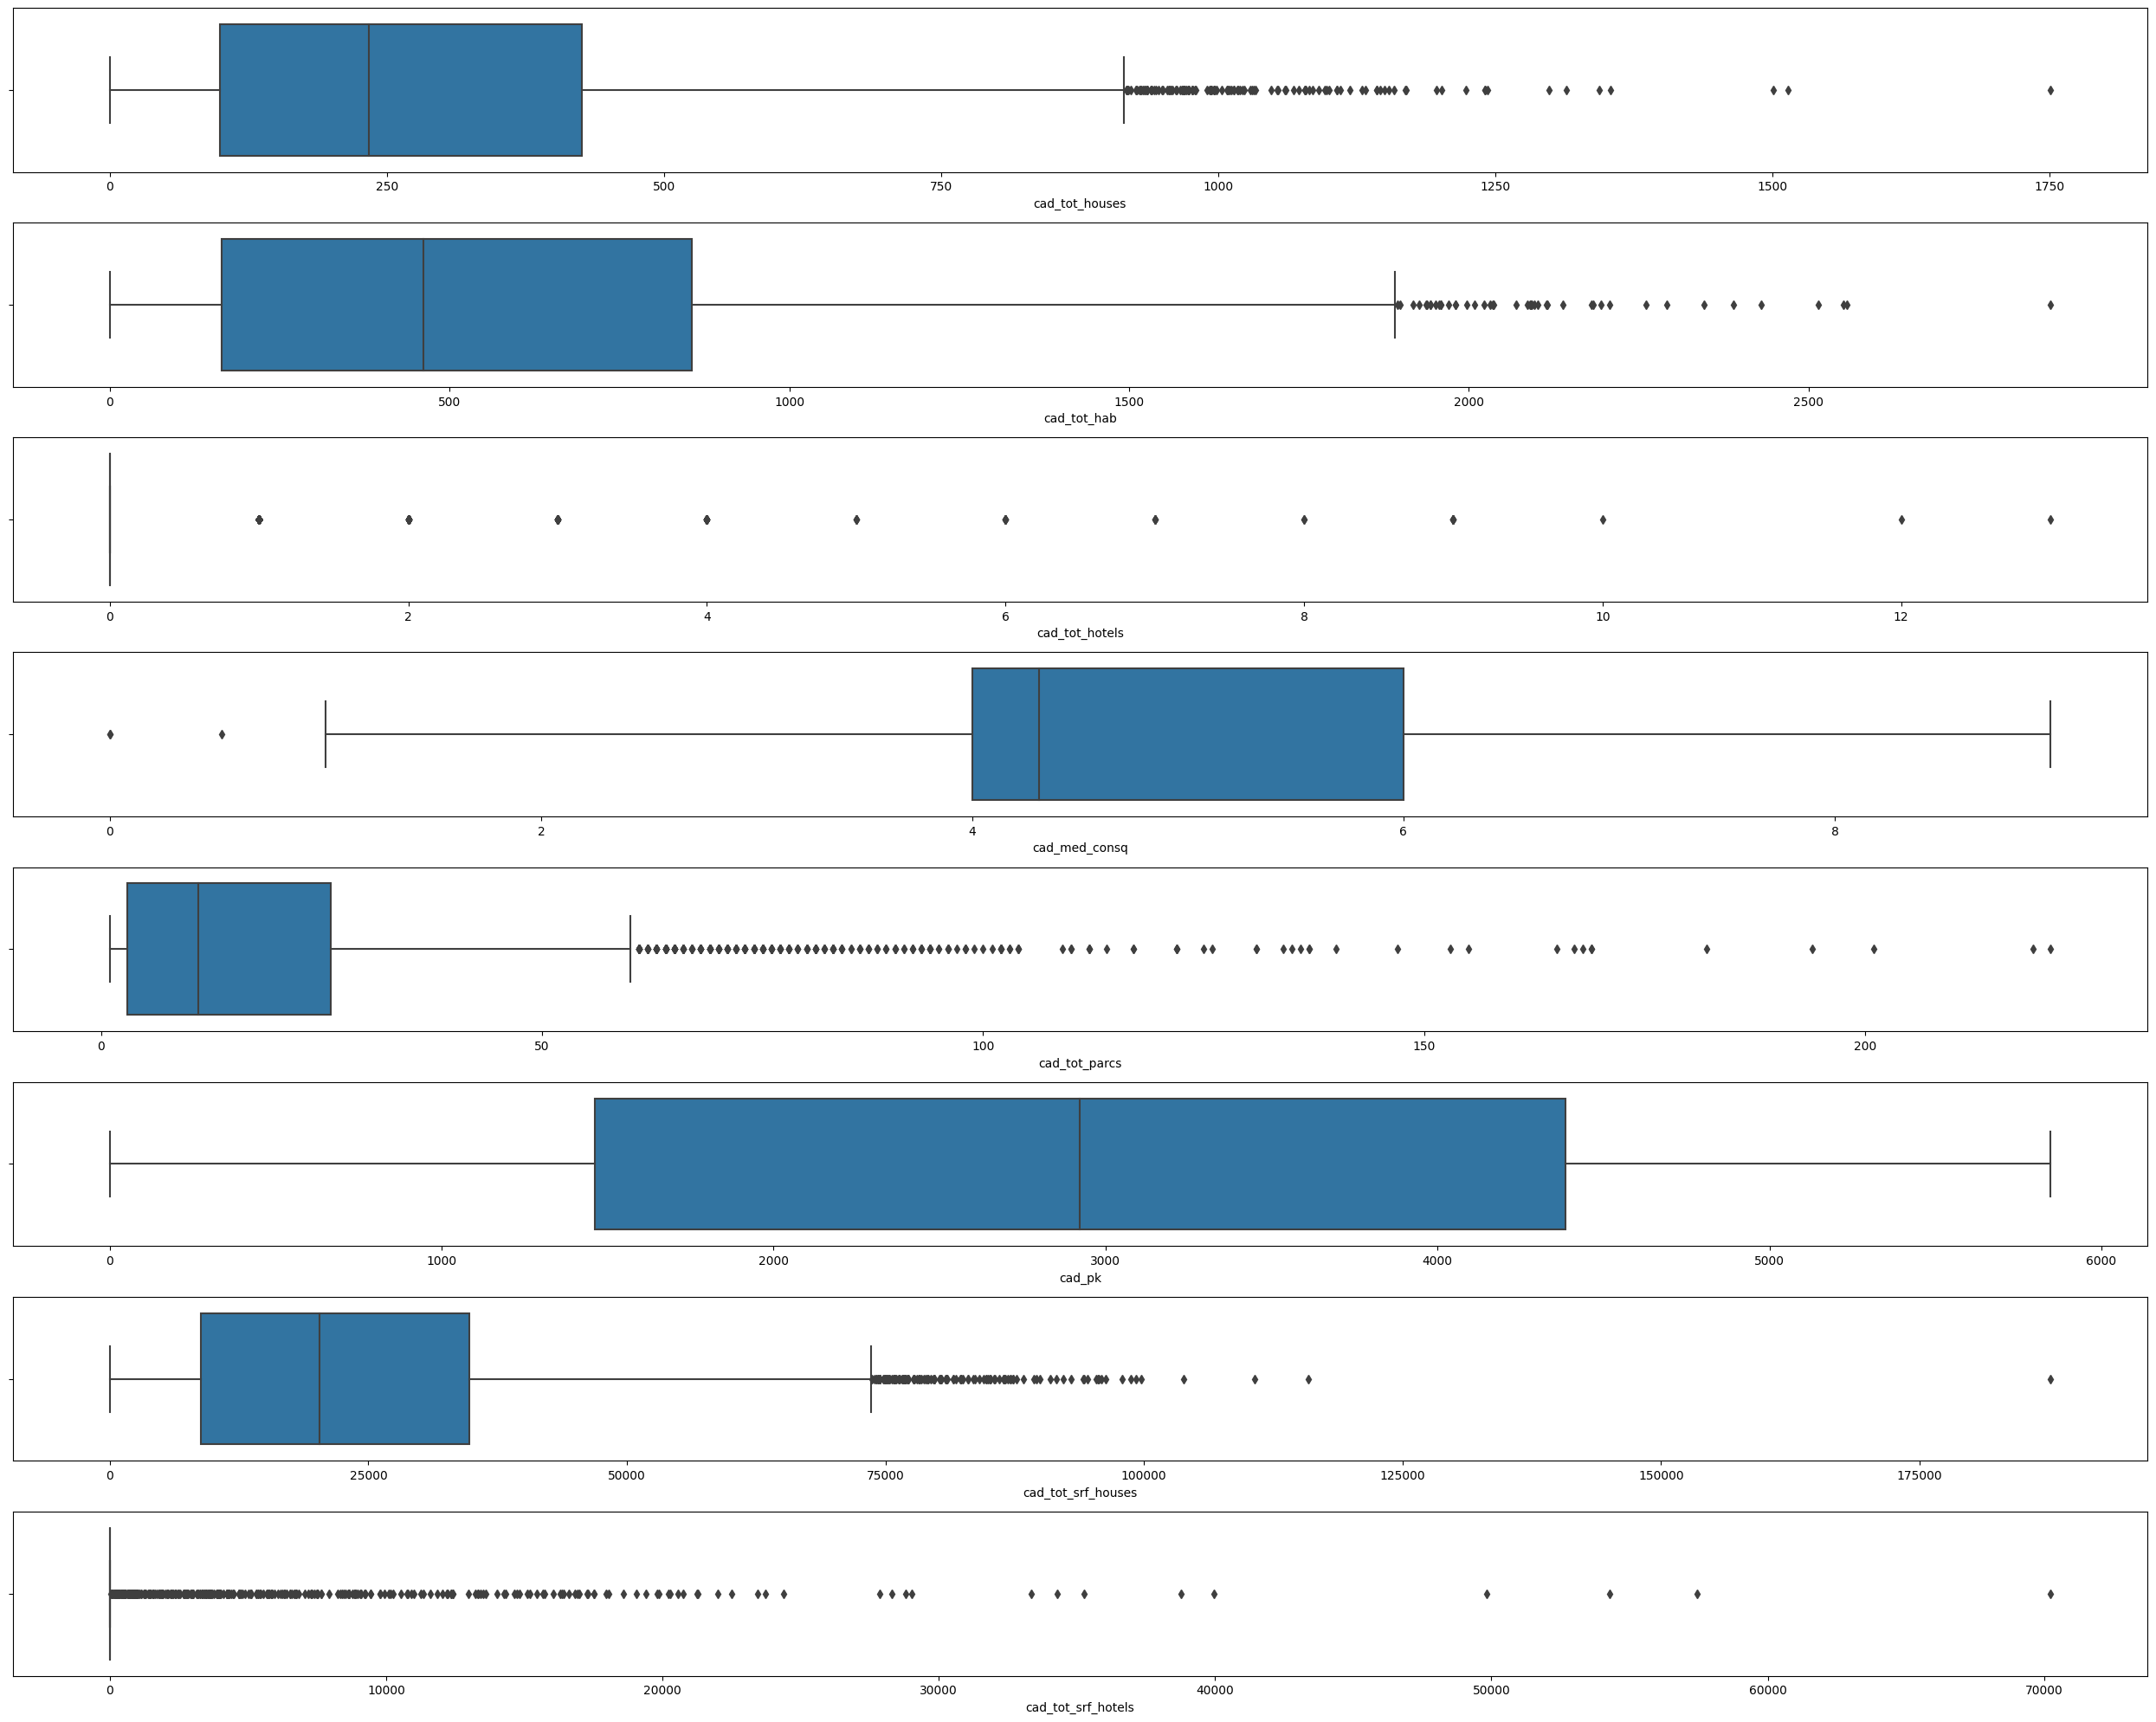

In [23]:
sc.chart_boxplot(df[cols_catastro])

In [24]:
df[cols_catastro].head()

,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
0,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0
1,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0
2,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0
3,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0
4,33.0,11.0,0.0,4.00000,1.0,4882.0,4256.0,0.0


the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.

# variables locales

In [25]:
cols_catastro = scl.columnList(df, 'cad_')

the columns that have cad_ on their name are: ['cad_tot_houses', 'cad_tot_hab', 'cad_tot_hotels', 'cad_med_consq', 'cad_tot_parcs', 'cad_pk', 'cad_tot_srf_houses', 'cad_tot_srf_hotels']


numeric variables distribution


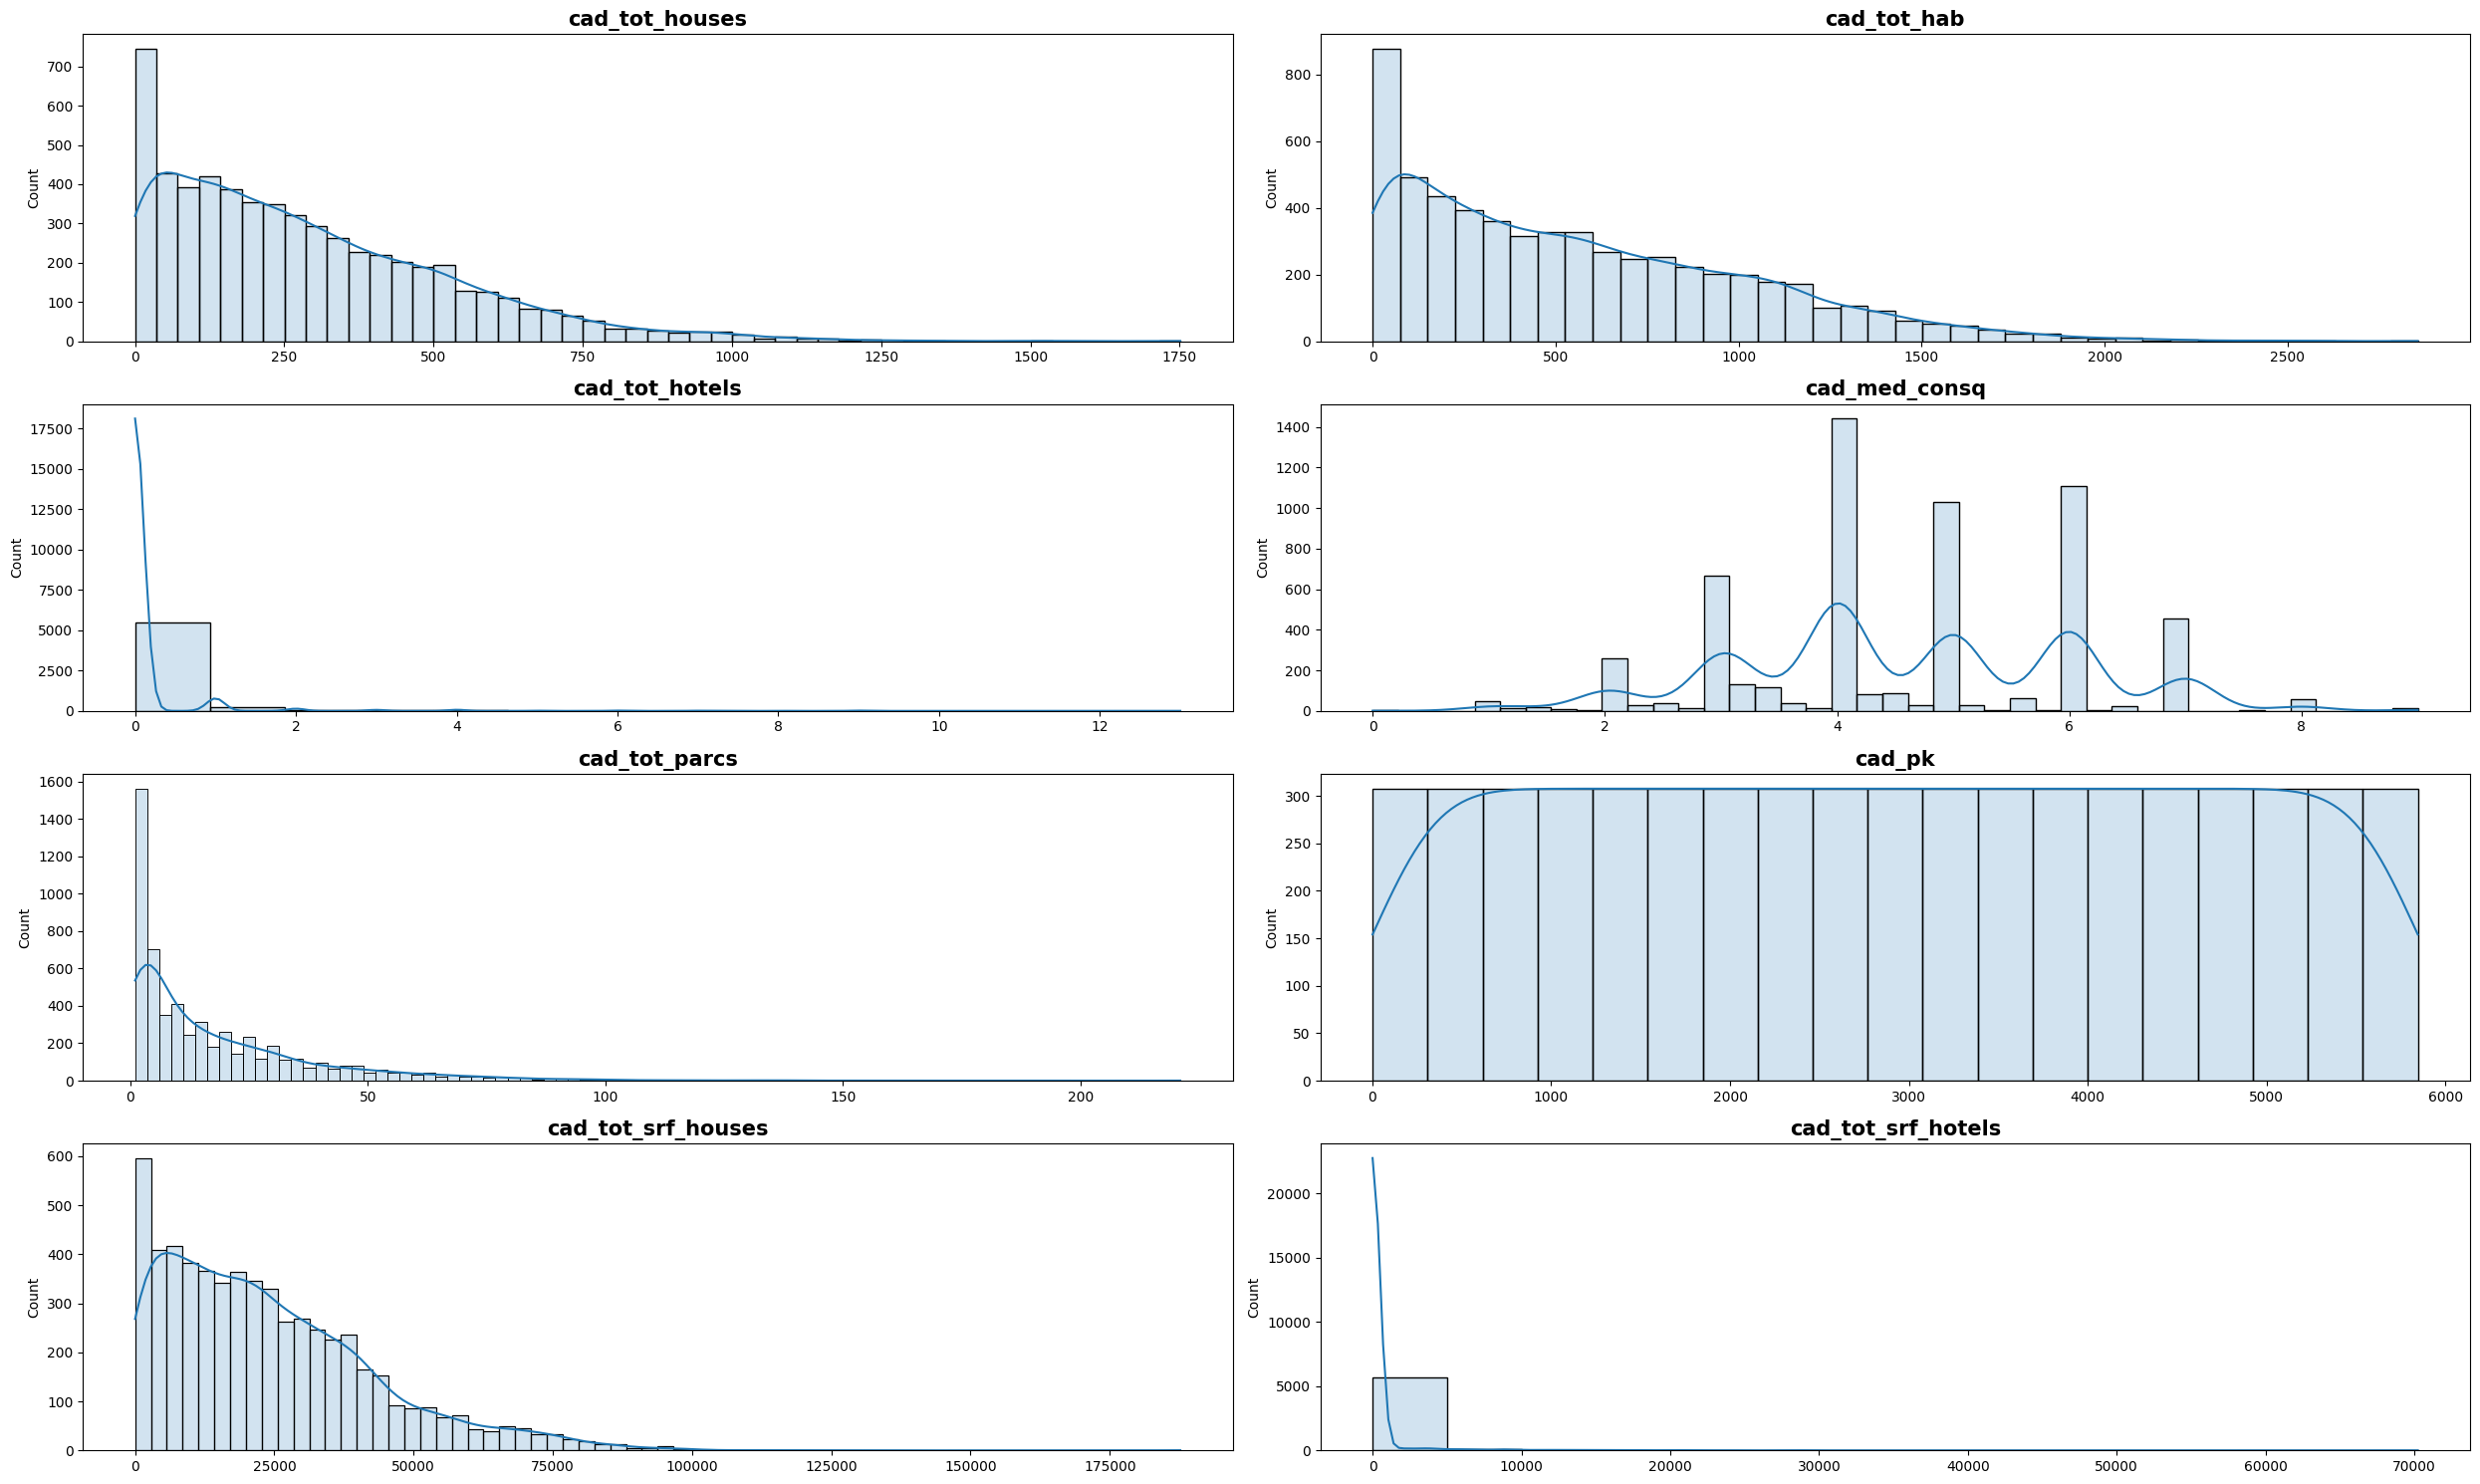

In [26]:
sc.distribucion_numericas(df[cols_catastro])

numeric variables distribution -> outliers


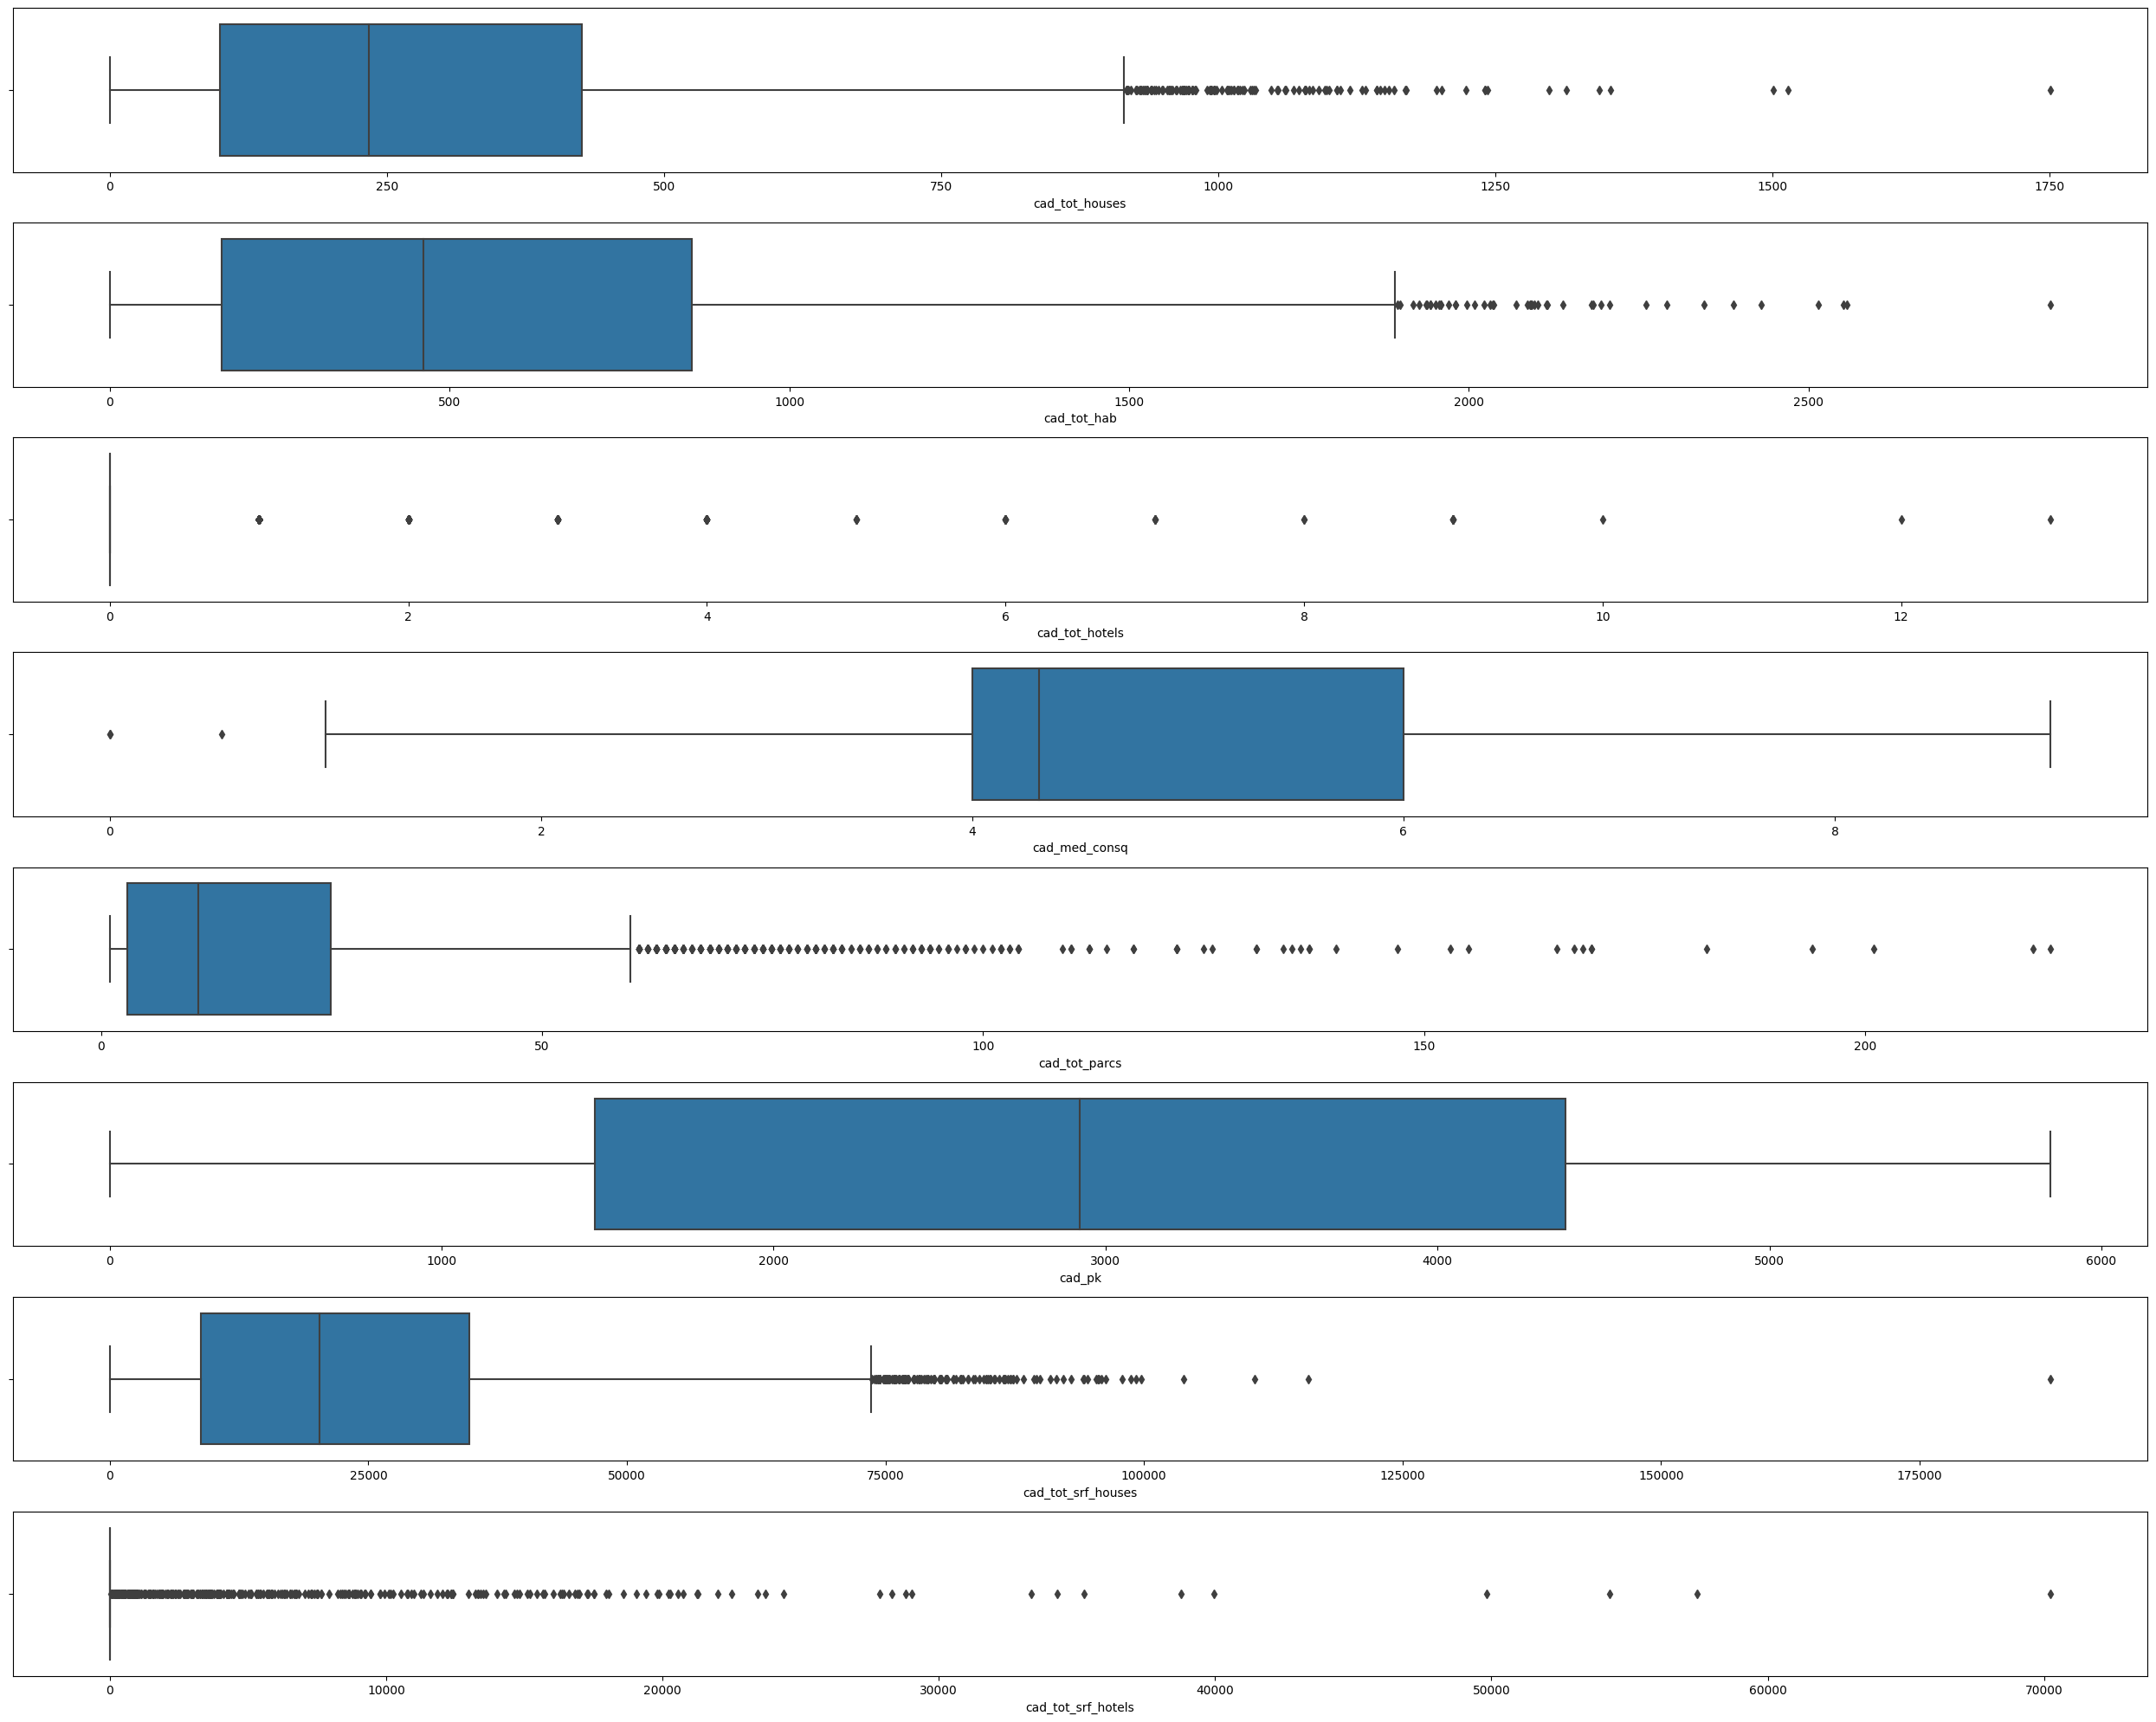

In [27]:
sc.chart_boxplot(df[cols_catastro])

In [28]:
df[cols_catastro].head()

,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
0,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0
1,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0
2,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0
3,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0
4,33.0,11.0,0.0,4.00000,1.0,4882.0,4256.0,0.0


the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.

# variables tripadvisor

In [29]:
cols_catastro = scl.columnList(df, 'cad_')

the columns that have cad_ on their name are: ['cad_tot_houses', 'cad_tot_hab', 'cad_tot_hotels', 'cad_med_consq', 'cad_tot_parcs', 'cad_pk', 'cad_tot_srf_houses', 'cad_tot_srf_hotels']


numeric variables distribution


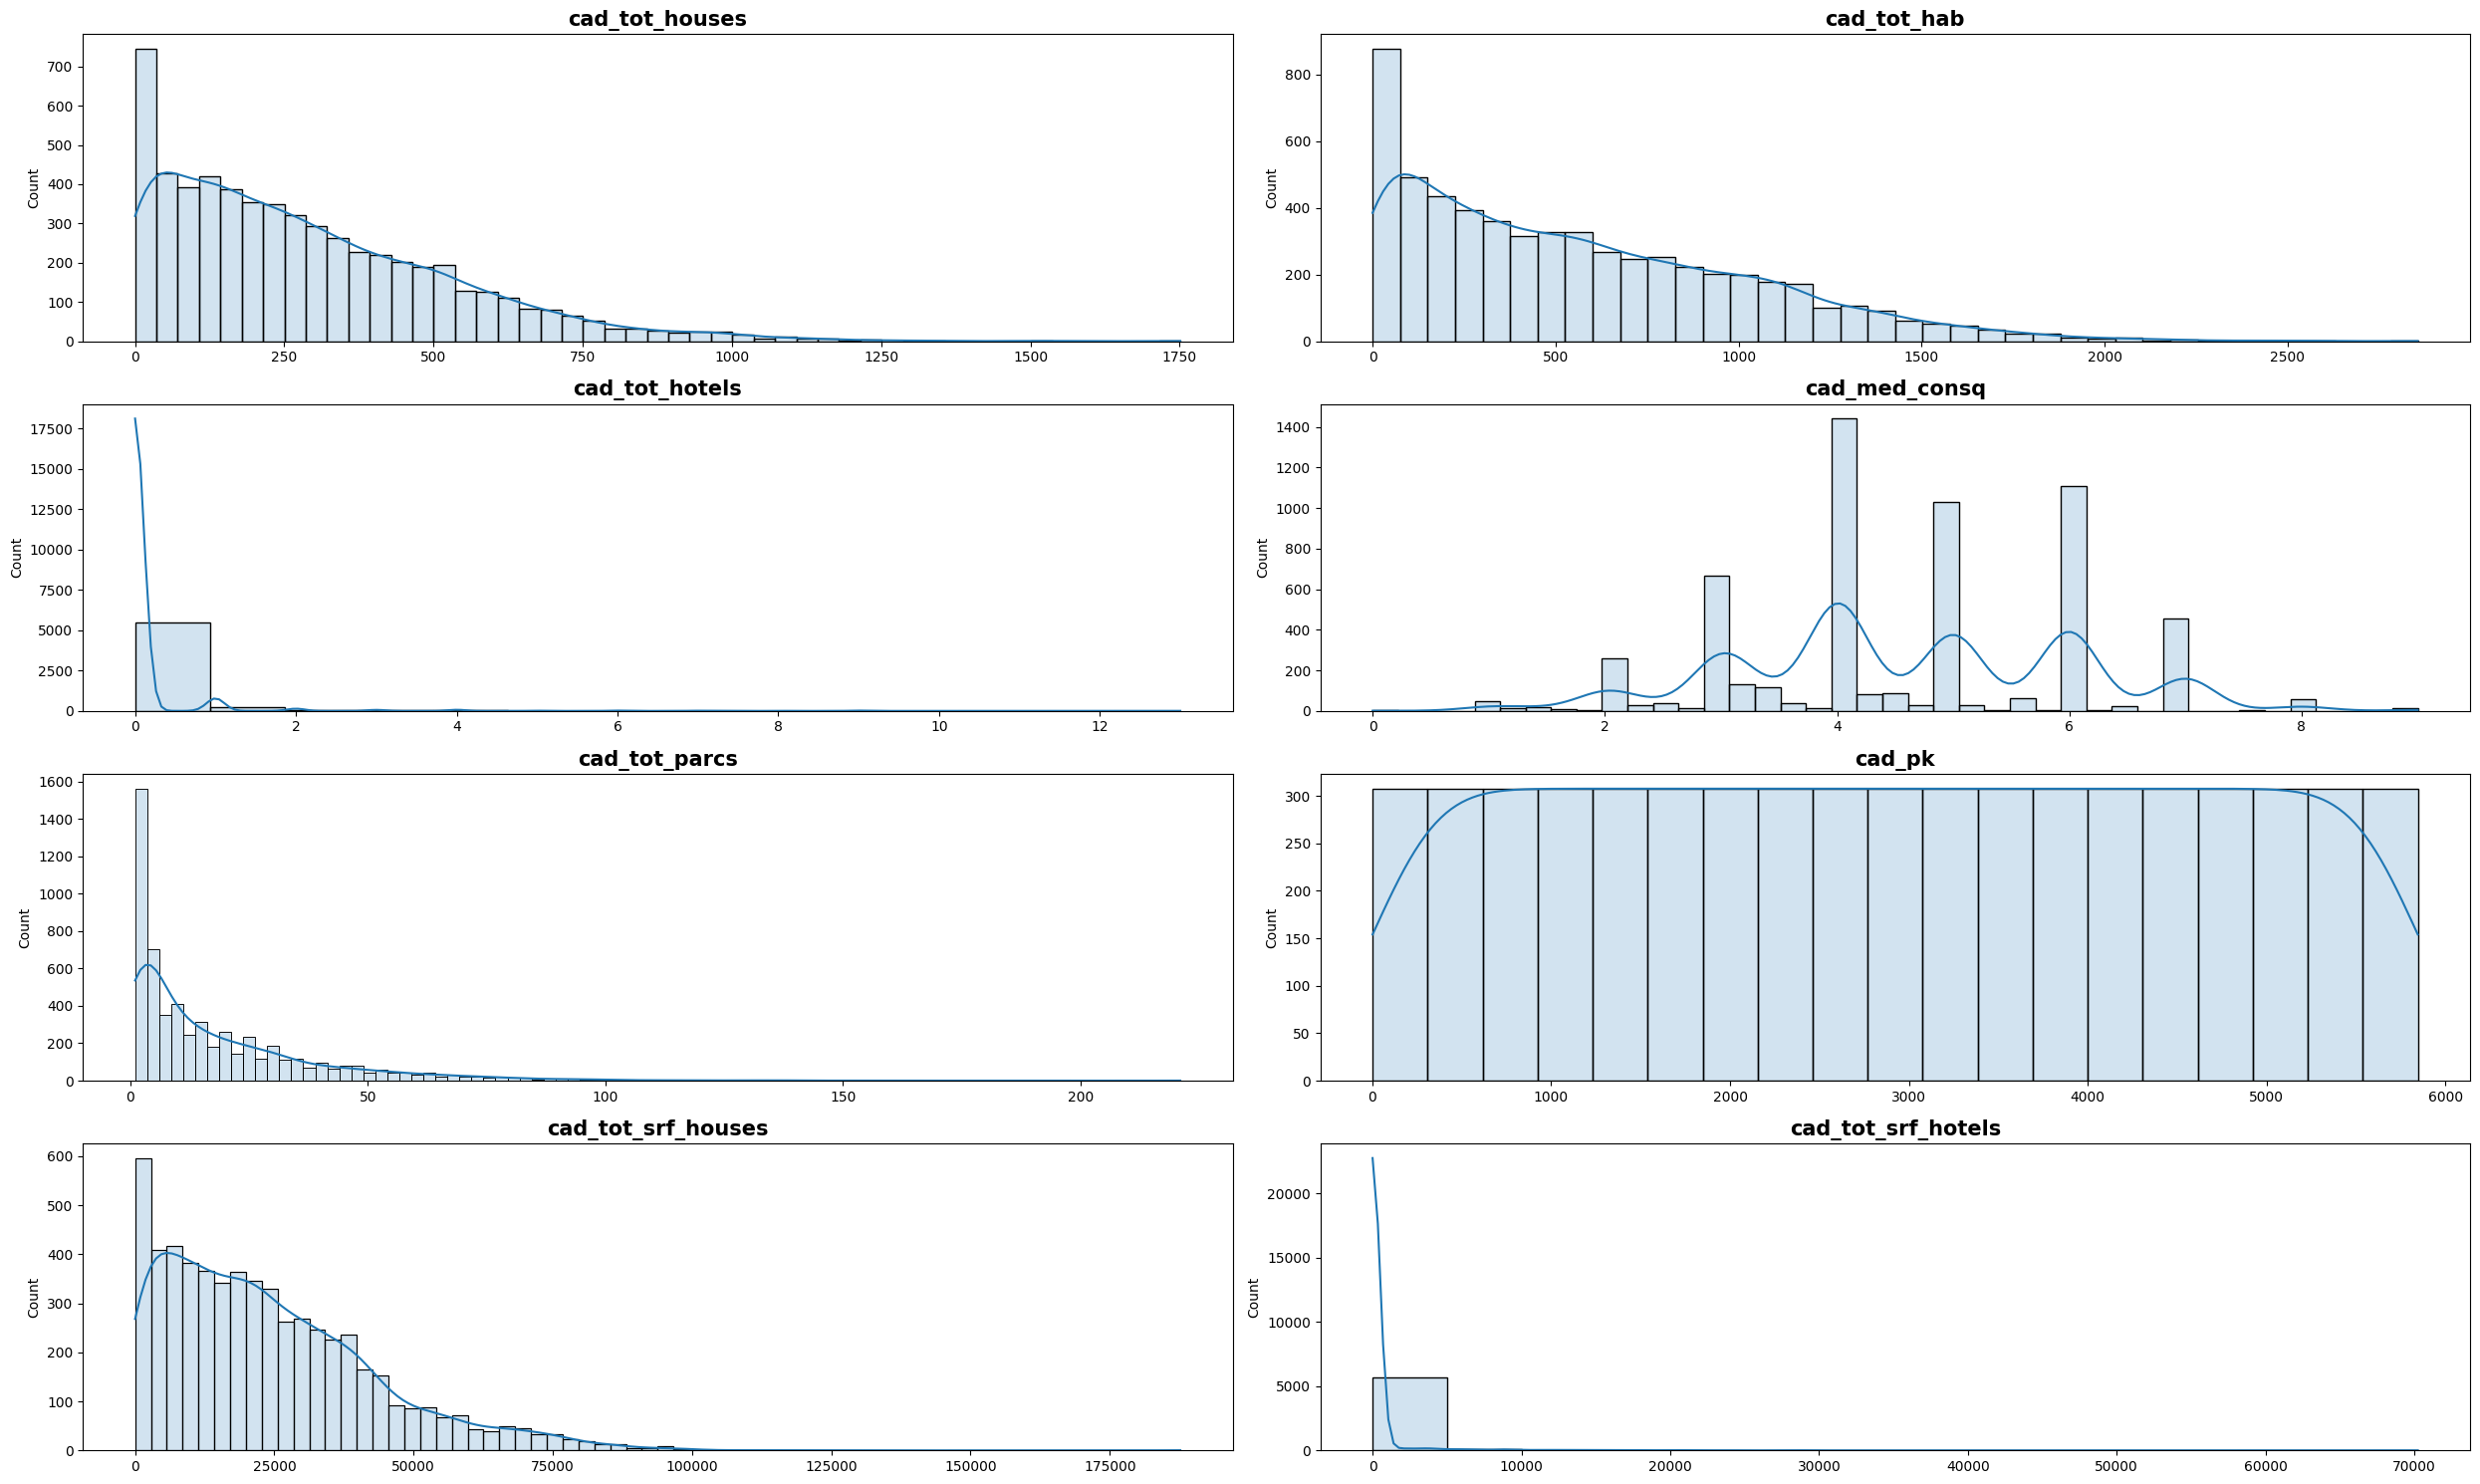

In [30]:
sc.distribucion_numericas(df[cols_catastro])

numeric variables distribution -> outliers


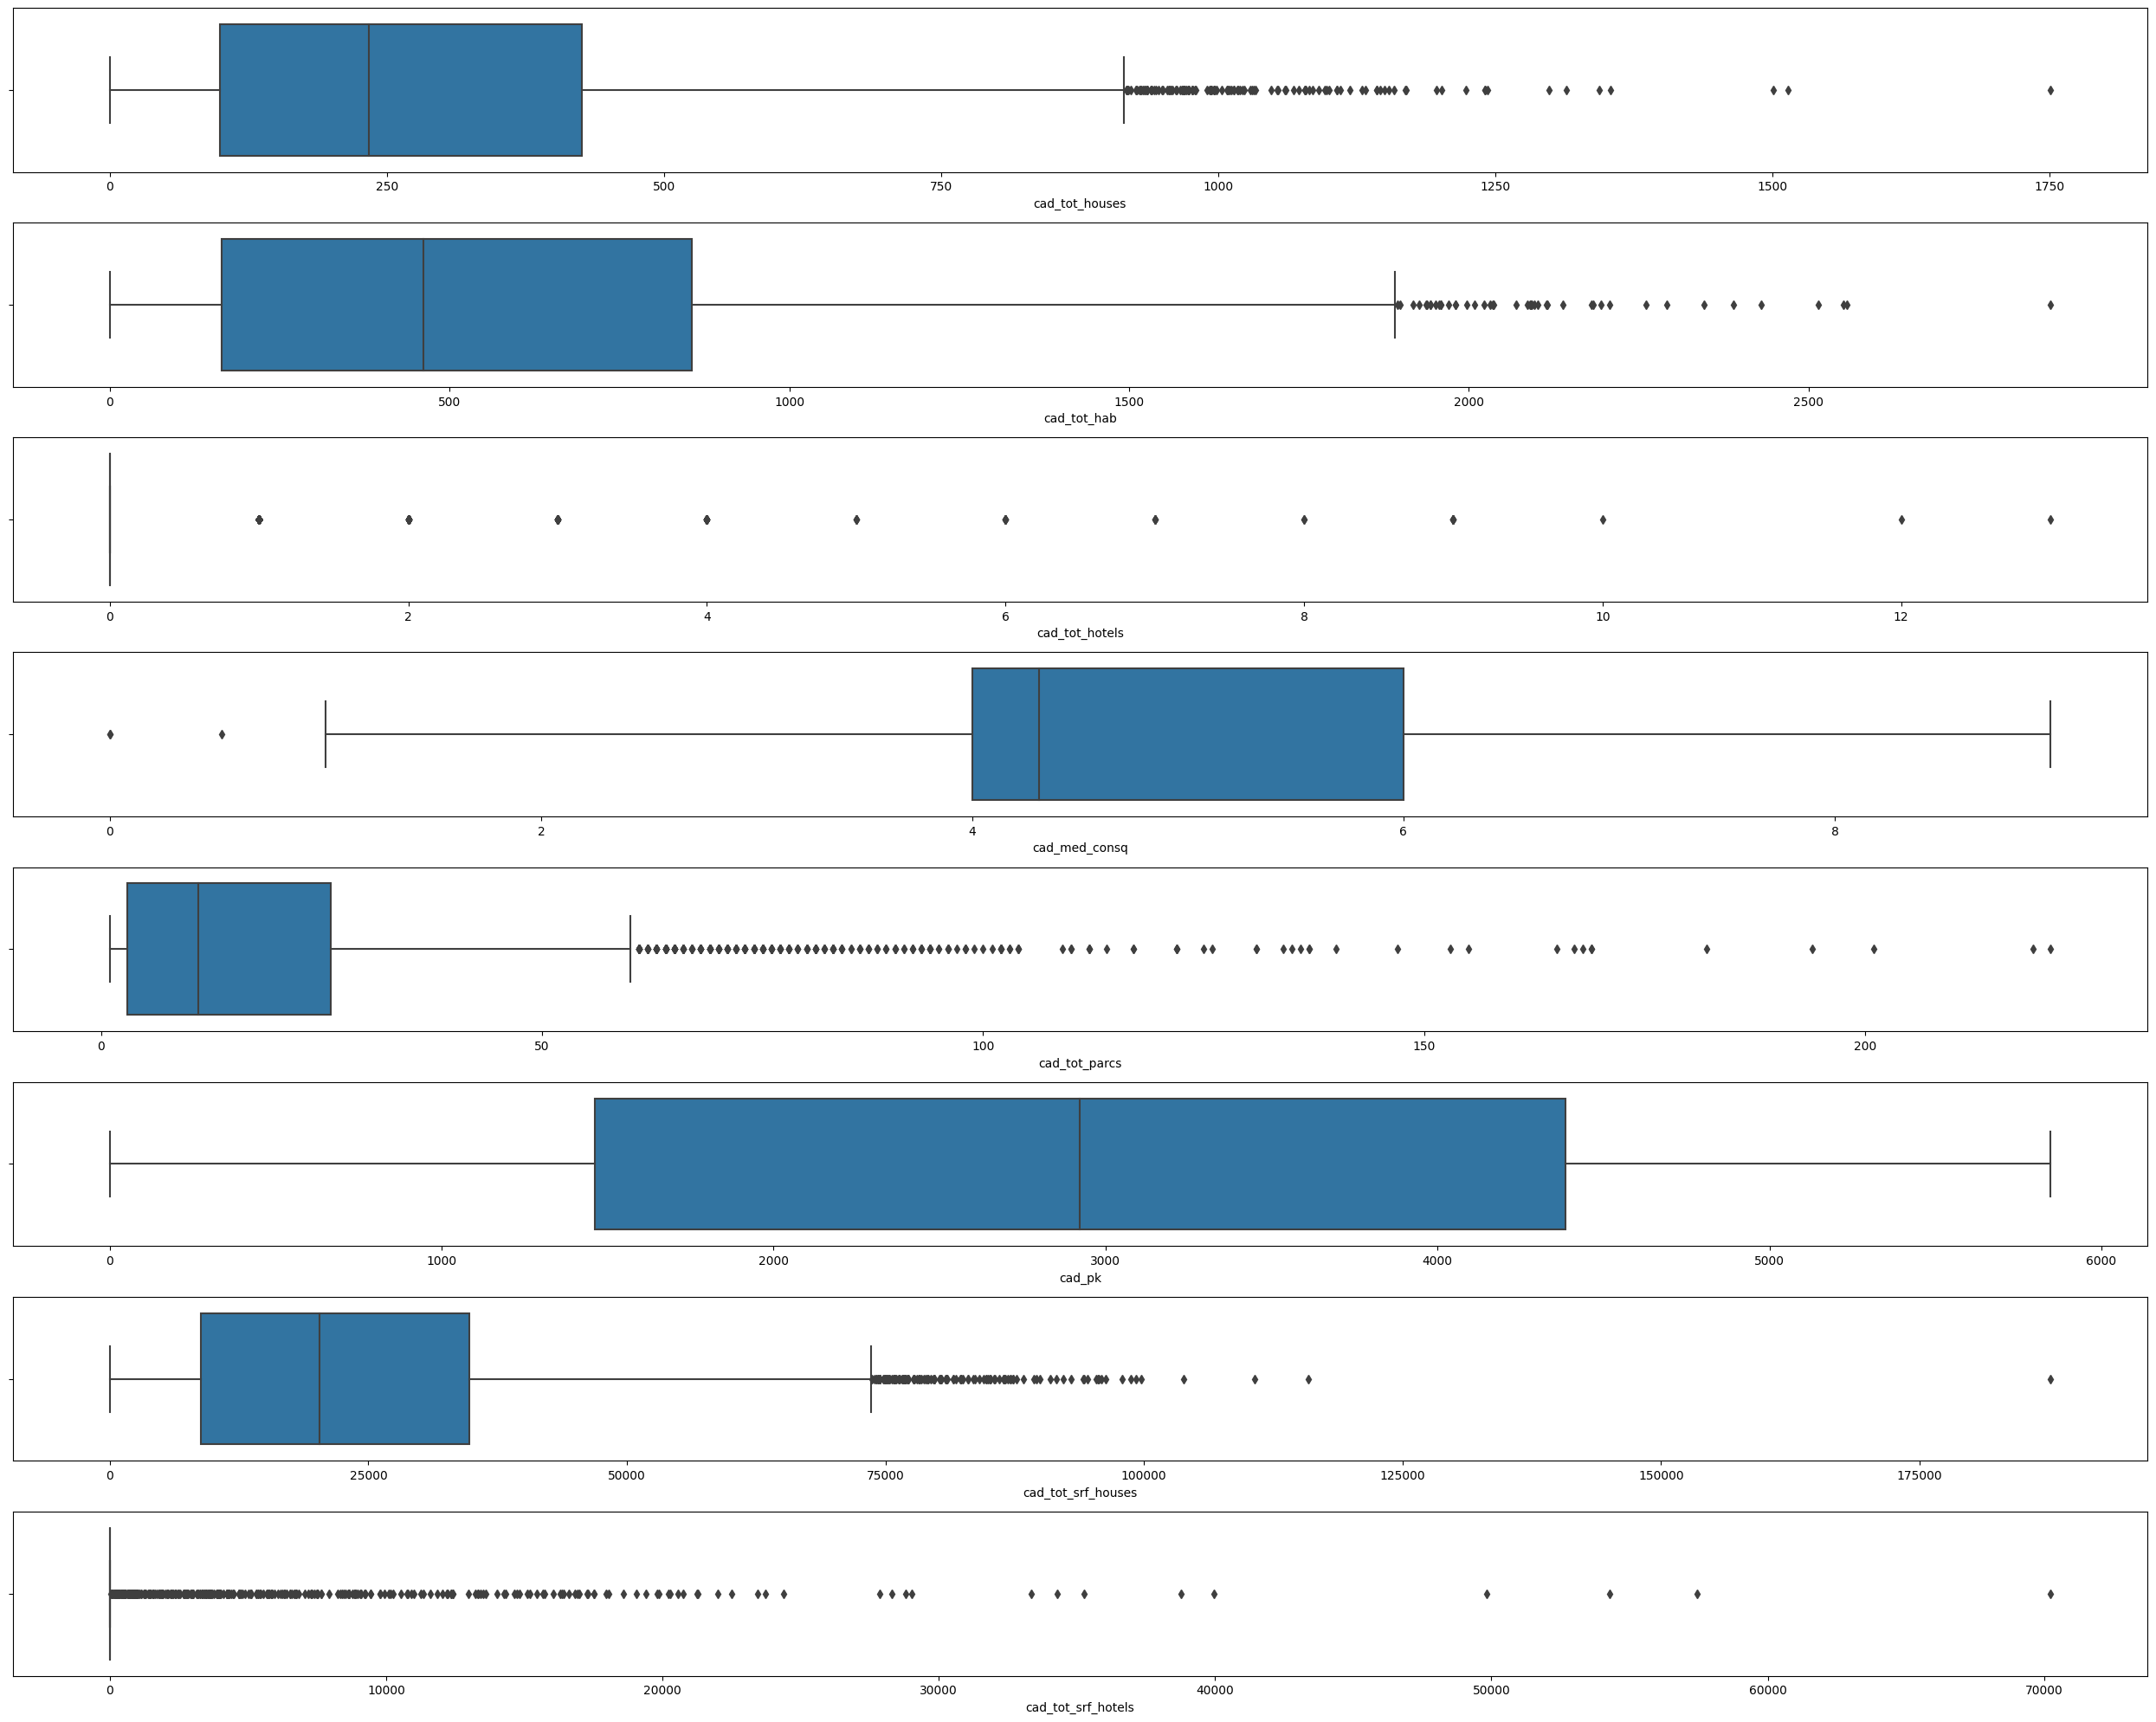

In [31]:
sc.chart_boxplot(df[cols_catastro])

In [32]:
df[cols_catastro].head()

,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
0,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0
1,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0
2,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0
3,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0
4,33.0,11.0,0.0,4.00000,1.0,4882.0,4256.0,0.0


the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.